In [1136]:
# TODO : Import necessary python libraries needed for this project

# For Data preparation and manipulation
import numpy as np
import pandas as pd
# For visualization
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import ExtraTreesClassifier


In [1137]:
# Set Seaborn styles
sb.set()

In [1138]:
# For implementing pipeline
from sklearn.pipeline import Pipeline

# For Scaling the data
from sklearn.preprocessing import StandardScaler

# For Classification
from sklearn.neighbors import KNeighborsClassifier

# For Splitting the data for training and Validation
from sklearn.model_selection import train_test_split

# For creating model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Principal Component Analysis for Dimensionality Reduction
from sklearn.decomposition import PCA

# For Shuffling the DataFrame
from sklearn.utils import shuffle

In [1139]:
# TODO : Load previous individuals loan data
loan_train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [1140]:
# TODO : Let's know how many factors of an individual and Number of Samples
print("The Loan Prediction Dataset has")
print("\t\tNumber of Factors : \t", loan_train.shape[1] - 1)
print("\t\tNumber of Samples : \t", loan_train.shape[0])

The Loan Prediction Dataset has
		Number of Factors : 	 12
		Number of Samples : 	 614


#EXPLORATORY DATA ANALYSIS

In [1141]:
# TODO : Descriptive Statistics on Loan Data
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [1142]:
# TODO : Print the factors of Loan Data
print('Loan Data Factors : \n')
j = 1
for i in loan_train.columns:
    print(j, '.', i)
    j += 1

Loan Data Factors : 

1 . Loan_ID
2 . Gender
3 . Married
4 . Dependents
5 . Education
6 . Self_Employed
7 . ApplicantIncome
8 . CoapplicantIncome
9 . LoanAmount
10 . Loan_Amount_Term
11 . Credit_History
12 . Property_Area
13 . Loan_Status


# Check dataset is balanced or imbalanced

In [1143]:
loan_train['Loan_Status'].isnull().sum()


0

In [1144]:
# TODO : To get unique values and value_counts on Loan_Status
print("Unique values : ", loan_train['Loan_Status'].unique())
print("Unique values counts : \n", loan_train['Loan_Status'].value_counts())

Unique values :  ['Y' 'N']
Unique values counts : 
 Y    422
N    192
Name: Loan_Status, dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

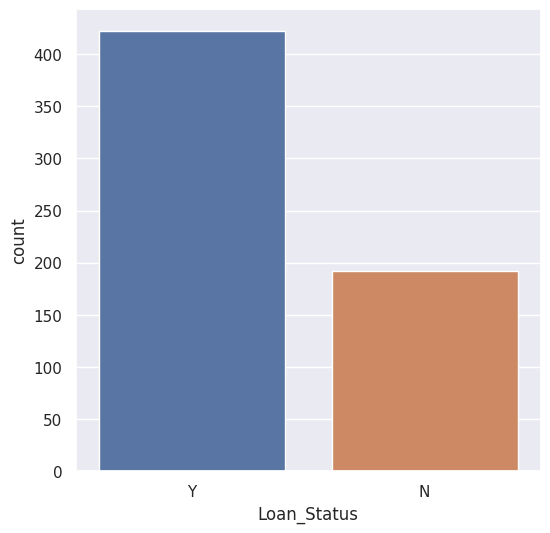

In [1145]:
# Let's plot the Unique value counts
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Loan_Status', data = loan_train)
# plt.savefig('../images/loan_status_counts.png')

# Remove the samples having null value in any the col, and Loan_Status must be YES

In [1146]:
loan_train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1147]:
loan_train.shape


(614, 13)

#Loan_ID

In [1148]:
# 1. Loan ID
loan_train['Loan_ID'].describe()


count          614
unique         614
top       LP001002
freq             1
Name: Loan_ID, dtype: object

#Gender

In [1149]:
# TODO : Describe Gender column
loan_train['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [1150]:
print("Number of null values : ", loan_train['Gender'].isnull().sum())
print("Unique values : ", loan_train['Gender'].unique())
print("Value counts : \n", loan_train['Gender'].value_counts())


Number of null values :  13
Unique values :  ['Male' 'Female' nan]
Value counts : 
 Male      489
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

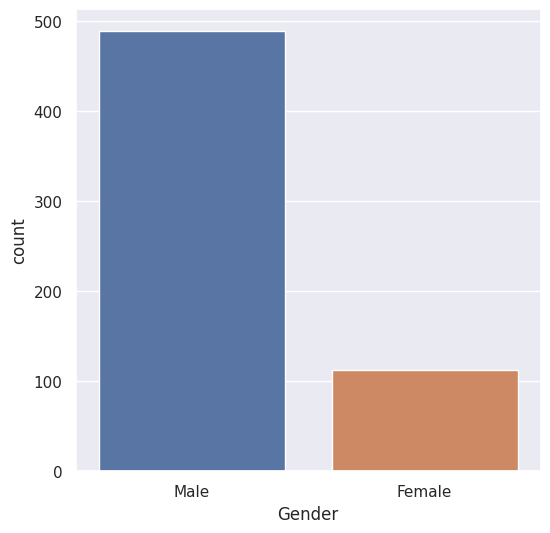

In [1151]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = loan_train)
# plt.savefig('../images/gender_counts_0.png')

In [1152]:
# TODO : Print the samples having null values in gender column
samples_with_null_values_on_gender_column = loan_train[loan_train['Gender'].isnull()]
samples_with_null_values_on_gender_column

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


Drop the samples having "yes" on Loan_Status

In [1153]:
# Initialize Gender predictor columns list
GENDER_PREDICTOR_COLUMNS = ['Dependents', 'ApplicantIncome', 'LoanAmount', 'Property_Area', 'Gender']

# Let's get the rows not having null values on gender column
samples_without_null_values_on_gender_column = loan_train[~loan_train['Gender'].isnull()][GENDER_PREDICTOR_COLUMNS]
print("Number of Samples Before dropping samples having null values in predictor columns for Gender column: ",
     samples_without_null_values_on_gender_column.shape[0])

# Dropping samples having null values in predictor columns
samples_without_null_values_on_gender_column = samples_without_null_values_on_gender_column.dropna(how = 'any')
print("Number of Samples After dropping samples having null values in predictor columns for Gender column: ",
     samples_without_null_values_on_gender_column.shape[0])

# Conveting categorical values on Dependents column to numerical values
samples_without_null_values_on_gender_column['Dependents'] = samples_without_null_values_on_gender_column['Dependents'].apply(
    lambda x : {'0': 0, '1':1, '2':2, '3+':3}[x]
)
# Conveting categorical values on Property_Area column to numerical values
samples_without_null_values_on_gender_column['Property_Area'] = samples_without_null_values_on_gender_column['Property_Area'].apply(
    lambda x : {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[x]
)

# Building Gender Predictor using Pipeline and KNeigborsClassifiers
Gender_predictor = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('gen_predictor', KNeighborsClassifier(n_neighbors = 1))
])
Gender_predictor.fit(samples_without_null_values_on_gender_column.iloc[:, :-1].values,
                    samples_without_null_values_on_gender_column.iloc[:, -1].values)

Number of Samples Before dropping samples having null values in predictor columns for Gender column:  601
Number of Samples After dropping samples having null values in predictor columns for Gender column:  566


Pipeline(steps=[('scaler', StandardScaler()),
                ('gen_predictor', KNeighborsClassifier(n_neighbors=1))])

In [1154]:
# Function which fills null values on Gender column
def gender_null_value_filler(df, Gender_predictor):
    for row in range(df.shape[0]):
        if df.loc[row, 'Gender'] is np.nan:
            X = loan_train.loc[row, GENDER_PREDICTOR_COLUMNS[:-1]].values.reshape(1, -1)
            X[0][0] = {'0': 0, '1':1, '2':2, '3+':3}[X[0][0]]
            X[0][3] = {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[X[0][3]]
            df.loc[row, 'Gender'] = Gender_predictor.predict(X)
    return df

In [1155]:
# TODO : Filling null values on Gender columns optimally
loan_train = gender_null_value_filler(loan_train, Gender_predictor)


In [1156]:
# Check the type for a few random entries in 'Gender' column
print("Type for a few random entries in 'Gender' column:")
for value in loan_train['Gender'].sample(5, random_state=1):
    print(type(value))

# Check if there are any arrays present in 'Gender' column
print("\nChecking for arrays in 'Gender' column:")
print(any(isinstance(value, np.ndarray) for value in loan_train['Gender']))


Type for a few random entries in 'Gender' column:
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>

Checking for arrays in 'Gender' column:
True


In [1157]:
# Convert NumPy arrays to strings in 'Gender' column
loan_train['Gender'] = loan_train['Gender'].apply(lambda x: str(x))

# Encoding Gender Column - Male: 1, Female: 0
gender_mapping = {'Male': 1, 'Female': 0}

loan_train['Gender'] = loan_train['Gender'].map(gender_mapping)
loan_train['Gender'] = loan_train['Gender'].fillna(-1).astype(int)


#Married

In [1158]:
# TODO : Describing Married column
loan_train['Married'].describe()

count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

In [1159]:
print("Number of null values : ", loan_train['Married'].isnull().sum())
print("Unique values : ", loan_train['Married'].unique())
print("Value counts : \n", loan_train['Married'].value_counts())

Number of null values :  3
Unique values :  ['No' 'Yes' nan]
Value counts : 
 Yes    398
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

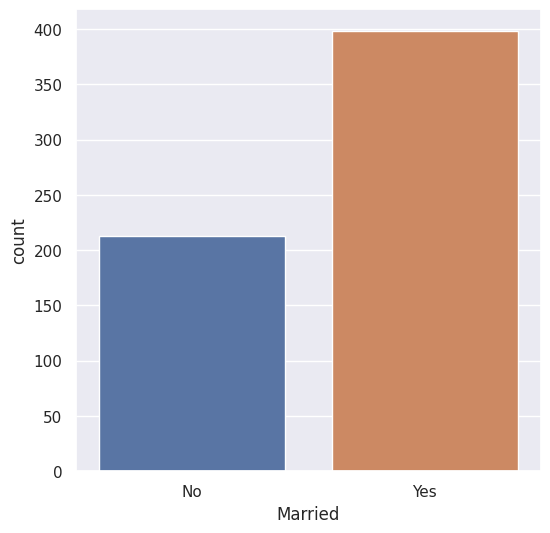

In [1160]:
# Let's plot the Unique value counts
plt.figure(figsize = (6, 6))
sb.countplot(x = 'Married', data = loan_train)
# plt.savefig('../images/married_counts_0.png')

In [1161]:
# TODO : Print the samples having null values in gender column
samples_with_null_values_on_gender_column = loan_train[loan_train['Married'].isnull()]
samples_with_null_values_on_gender_column

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,1,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,1,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,0,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [1162]:
loan_train[loan_train['Married'] == 'Yes'].describe(include = 'all').iloc[:, :]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,398,398.000000,398,390,398,380,398.000000,398.000000,384.000000,389.000000,362.000000,398,398
unique,398,NaN,1,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001003,NaN,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,NaN,398,174,309,326,NaN,NaN,NaN,NaN,NaN,151,285
mean,NaN,0.871859,NaN,NaN,NaN,NaN,5629.173367,1794.632965,155.750000,336.987147,0.842541,NaN,NaN
std,NaN,0.402964,NaN,NaN,NaN,NaN,6989.254425,2039.962354,89.934267,66.739163,0.364737,NaN,NaN
min,NaN,-1.000000,NaN,NaN,NaN,NaN,150.000000,0.000000,17.000000,12.000000,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,2817.500000,0.000000,108.000000,360.000000,1.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN,3854.500000,1625.000000,132.000000,360.000000,1.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,5820.500000,2464.000000,178.500000,360.000000,1.000000,NaN,NaN


In [1163]:
# Let's fill null values in Married columns with 'Yes'
loan_train['Married'] = loan_train['Married'].fillna('Yes')

In [1164]:
# TODO : To know the unique value counts
loan_train['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [1165]:
# TODO : encoding categorical values into numerical values
loan_train['Married'] = loan_train['Married'].apply(lambda x : {'Yes'})

#Dependents

In [1166]:
# TODO : Describing Dependents column
loan_train['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

In [1167]:
print("Number of null values : ", loan_train['Dependents'].isnull().sum())
print("Unique values : ", loan_train['Dependents'].unique())
print("Value counts : \n", loan_train['Dependents'].value_counts())

Number of null values :  15
Unique values :  ['0' '1' '2' '3+' nan]
Value counts : 
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


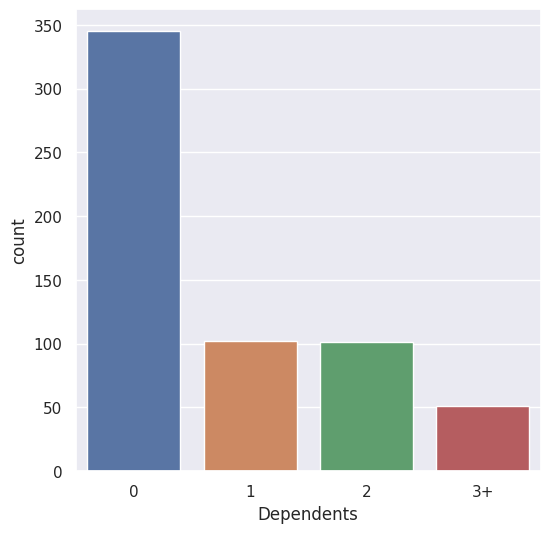

In [1168]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Dependents', data = loan_train)
# plt.savefig('../images/dependents_counts_0.png')
plt.show()

In [1169]:
# TODO : Display the 15 rows having null values in Dependents column
loan_train[loan_train['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,1,{Yes},NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,1,{Yes},NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,1,{Yes},NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,1,{Yes},NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,1,{Yes},NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,0,{Yes},NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,1,{Yes},NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,1,{Yes},NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,1,{Yes},NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,1,{Yes},NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [1170]:
# TODO : Function for filling null values on dependents columns
def dependents_null_value_filler(df):
    for row in range(df.shape[0]):
        if df.loc[row, 'Dependents'] is np.nan:
            df.loc[row, 'Dependents'] = str(df.loc[row, 'Married'])
    return df

In [1171]:
# TODO : Fill null values on Dependents column
loan_train = dependents_null_value_filler(loan_train)

In [1172]:
# TODO : Encoding Categorical data into NUmerical Data
loan_train['Dependents'] = loan_train['Dependents'].apply(lambda x : {'0'})

#Education

In [1173]:
# TODO : Descriptive Statistics on EDucation columns
loan_train['Education'].describe()

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object

In [1174]:
# TODO : Number of nul values on Education column
loan_train['Education'].isnull().sum()

0

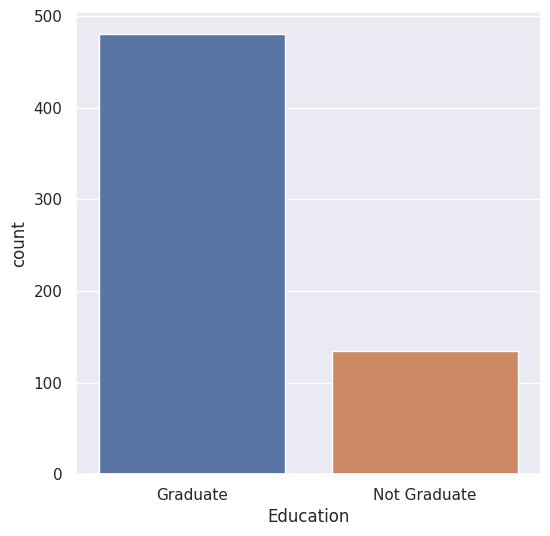

In [1175]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Education', data = loan_train)
# plt.savefig('../images/education_counts_0.png')
plt.show()

In [1176]:
# TODO : Encoding categorical data into Numerical data
loan_train['Education'] = loan_train['Education'].apply(lambda x : {'Graduate' : 1, 'Not Graduate' : 0}[x])


#Self_Employed

In [1177]:
# TODO : Descriptive Statistics on Self_Employed column
loan_train['Self_Employed'].describe()

count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object

In [1178]:
# TODO : Uniques and Values count on Self_Employed column
print("Number of null values : ", loan_train['Self_Employed'].isnull().sum())
print("Unique values : ", loan_train['Self_Employed'].unique())
print("Value counts : \n", loan_train['Self_Employed'].value_counts())

Number of null values :  32
Unique values :  ['No' 'Yes' nan]
Value counts : 
 No     500
Yes     82
Name: Self_Employed, dtype: int64


In [1179]:
# TODO : Filling Null values with No on Self_Employed column
loan_train['Self_Employed'].fillna(value = 'No', inplace = True)

# TODO : Encoding Self_Employed as 1 and Not Self_Employed as 0
loan_train['Self_Employed'] = loan_train['Self_Employed'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])

#Applicant Income

In [1180]:
# TODO : Descriptive Statistics on Applicant Income
loan_train['ApplicantIncome'].describe()


count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [1181]:
# TODO : Check for null values on ApplicantIncome column
loan_train['ApplicantIncome'].isnull().sum()

0

<ipython-input-1182-7bb621ff522b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(loan_train['ApplicantIncome'], rug = True, bins = 100, color='r')


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

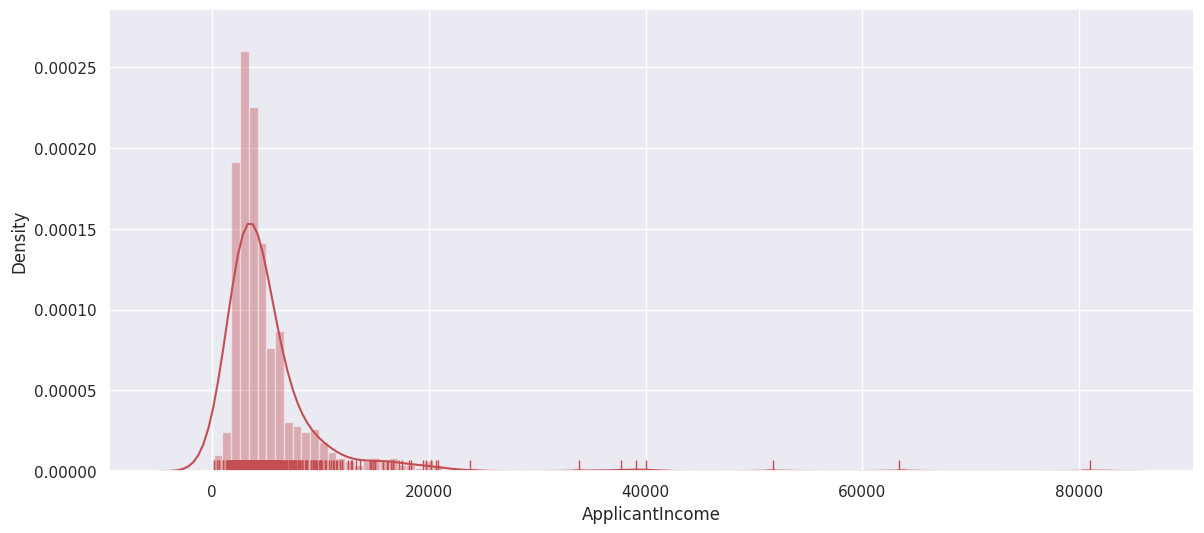

In [1182]:
# TODO : Distribution of Applicant Income

plt.figure(figsize = (14, 6))
sb.distplot(loan_train['ApplicantIncome'], rug = True, bins = 100, color='r')
# plt.savefig('../images/ApplicantIncomeDistribution.png')

In [1183]:
# TODO : Displaying the applicants having income more than 20,000
loan_train[loan_train['ApplicantIncome'] > 20000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
126,LP001448,-1,{Yes},{0},1,0,23803,0.0,370.0,360.0,1.0,Rural,Y
130,LP001469,1,{Yes},{0},1,1,20166,0.0,650.0,480.0,NaN,Urban,Y
155,LP001536,1,{Yes},{0},1,0,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,LP001585,-1,{Yes},{0},1,0,51763,0.0,700.0,300.0,1.0,Urban,Y
183,LP001637,1,{Yes},{0},1,0,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,LP001640,1,{Yes},{0},1,1,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
284,LP001922,1,{Yes},{0},1,0,20667,0.0,NaN,360.0,1.0,Rural,N
308,LP001996,1,{Yes},{0},1,0,20233,0.0,480.0,360.0,1.0,Rural,N
333,LP002101,1,{Yes},{0},1,0,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,1,{Yes},{0},1,0,81000,0.0,360.0,360.0,0.0,Rural,N


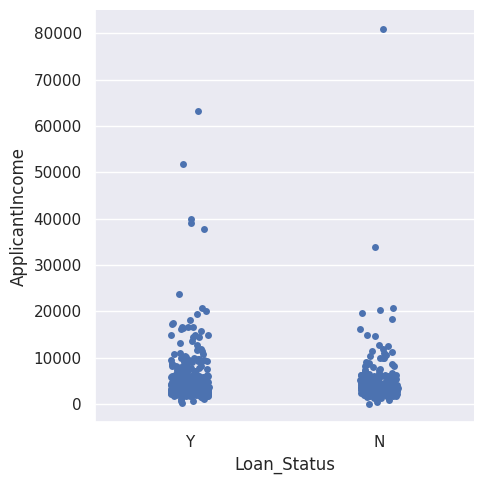

In [1184]:
# TODO : Let's know the contribution of Applicant Income on determining Loan_Status
sb.catplot(x = 'Loan_Status', y = 'ApplicantIncome', data = loan_train)

#Co-applicant Income

In [1185]:
# TODO : Descriptive Statistics on Co-applicant's Income
loan_train['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [1186]:
# TODO : Check for null values on co-applicant income column
loan_train['CoapplicantIncome'].isnull().sum()

0

<ipython-input-1187-891343b27046>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(loan_train['CoapplicantIncome'], rug = True, color = 'r')


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

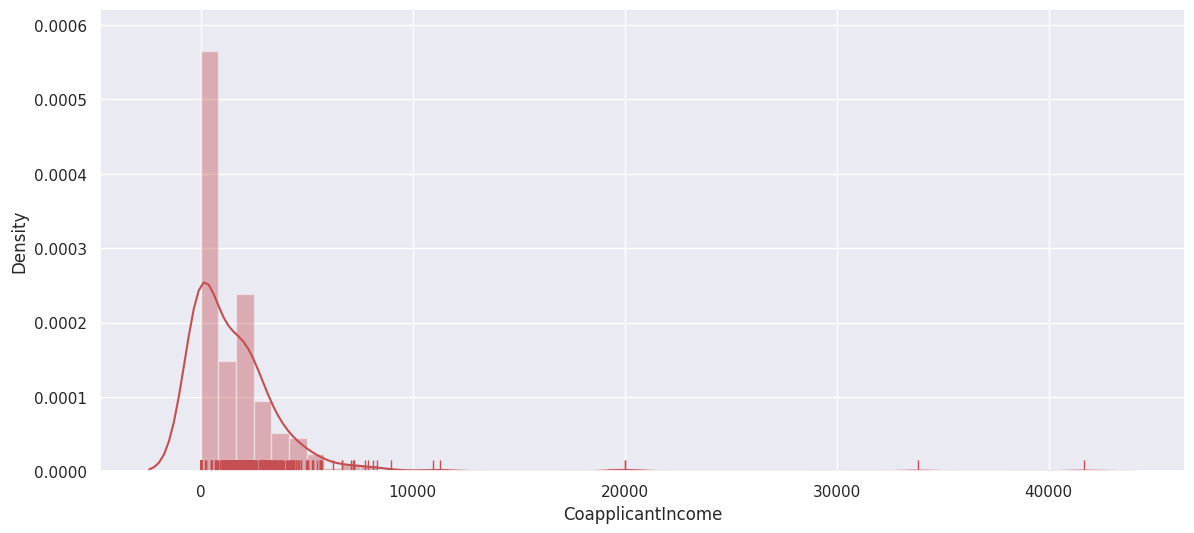

In [1187]:
plt.figure(figsize = (14, 6))
sb.distplot(loan_train['CoapplicantIncome'], rug = True, color = 'r')
# plt.savefig('../images/CoapplicantIncomeDistribution.png')

In [1188]:
# TODO : Let's get the different values counts on CoapplicantIncome column
loan_train['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

#LoanAmount

In [1189]:
# TODO : Descriptive Statistics on LoanAmount
loan_train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

<ipython-input-1190-aa82273b1e3c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(loan_train['LoanAmount'], rug = True, color = 'r')


<Axes: xlabel='LoanAmount', ylabel='Density'>

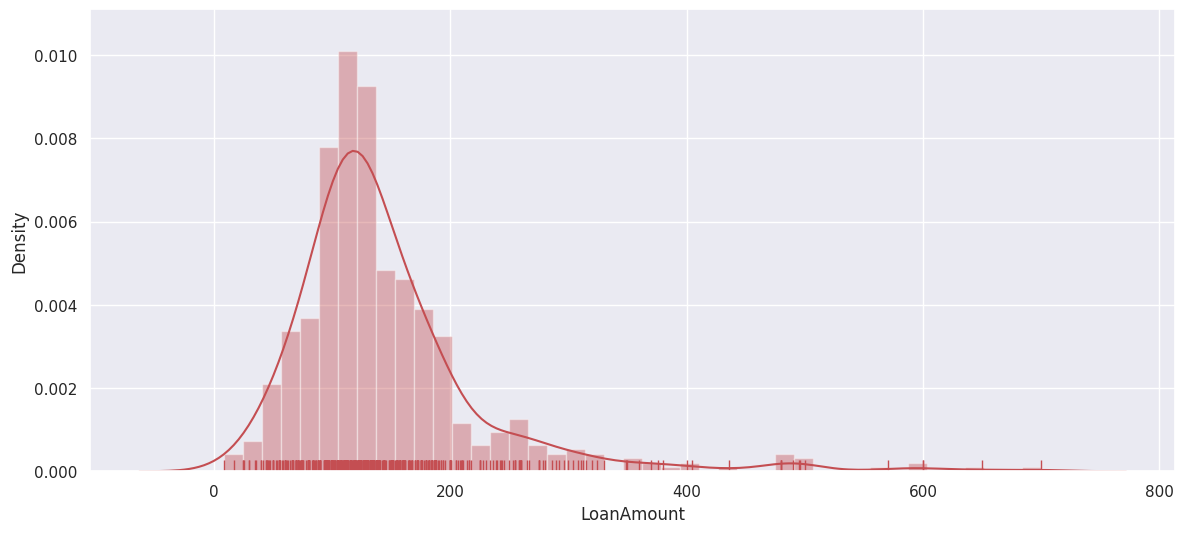

In [1190]:
# TODO : Distribution of LoanAmount
plt.figure(figsize = (14, 6))
sb.distplot(loan_train['LoanAmount'], rug = True, color = 'r')
# plt.savefig('../images/LoanAmountDistribution.png')

In [1191]:
# TODO : Let's know the different LoanAmount
loan_train['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [1192]:
# TODO : Count of Null values on LoanAmount column
loan_train['LoanAmount'].isnull().sum()

22

In [1193]:
# TODO : Display the Samples having null values on LoanAmount
loan_train[loan_train['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,{Yes},{0},1,0,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,1,{Yes},{0},1,0,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,1,{Yes},{0},1,0,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,1,{Yes},{0},1,1,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,1,{Yes},{0},1,0,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,1,{Yes},{0},1,0,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,1,{Yes},{0},1,0,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,0,{Yes},{0},1,1,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,1,{Yes},{0},1,0,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,1,{Yes},{0},0,0,3992,0.0,NaN,180.0,1.0,Urban,N


In [1194]:
# TODO : To know if yes in LoanStatus, then what is the average LoanAmount
#        and if no in LoanStatus, then what is the average LoanAmount by using GroupBy in LoanStatus

loan_train[~loan_train['LoanAmount'].isnull()].groupby('Loan_Status').describe().T.loc['LoanAmount']

Loan_Status,N,Y
count,181.000000,411.000000
mean,151.220994,144.294404
std,85.862783,85.484607
min,9.000000,17.000000
25%,100.000000,100.000000
50%,129.000000,126.000000
75%,176.000000,161.000000
max,570.000000,700.000000


In [1195]:
# TODO : Filling Above values on LoanAmount column based on LoanStatus.
def LoanAmount_null_values_filler(df):
    for row in range(df.shape[0]):
        if pd.isnull(df.loc[row, 'LoanAmount']):
            if df.loc[row, 'Loan_Status'] == 'Y':
                df.loc[row, 'LoanAmount'] = 151.22
            elif df.loc[row, 'Loan_Status'] == 'N':
                df.loc[row, 'LoanAmount'] = 144.29
            else:
                pass
    return df

In [1196]:
# TODO : Filling null values on LoanAmount
loan_train = LoanAmount_null_values_filler(loan_train)

10. Loan_Amount_Term

In [1197]:
# TODO : Descriptive Statistics on Loan_Amount_Term
loan_train['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [1198]:
# TODO : Number of null values on Loan_Amount_Term
loan_train['Loan_Amount_Term'].isnull().sum()

14

In [1199]:
# TODO : Unique Values count in Loan_Amount_Term column
loan_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

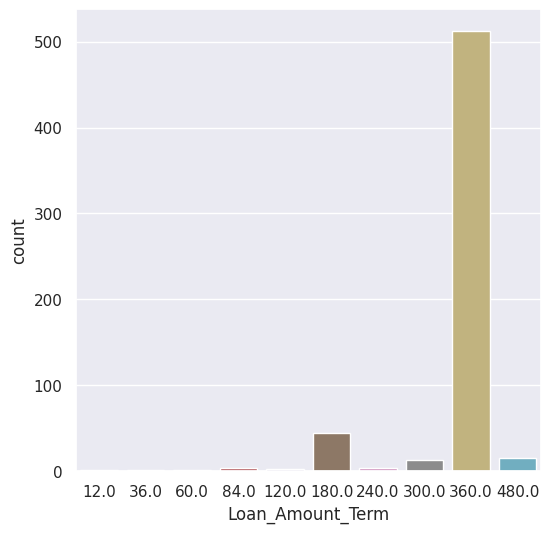

In [1200]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Loan_Amount_Term', data = loan_train)
# plt.savefig('../images/term_counts.png')
plt.show()

In [1201]:
# TODO : Display the applicant samples aving null values on Loan_Amount_Term
loan_train[pd.isnull(loan_train['Loan_Amount_Term'])]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,1,{Yes},{0},1,0,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,1,{Yes},{0},1,0,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,1,{Yes},{0},0,1,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,0,{Yes},{0},1,0,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,1,{Yes},{0},0,0,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,1,{Yes},{0},0,0,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,1,{Yes},{0},1,0,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,0,{Yes},{0},0,0,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,1,{Yes},{0},1,0,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,1,{Yes},{0},0,0,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [1202]:
# TODO : To know if yes in LoanStatus, then what is the average Loan_Amount_Term
#        and if no in LoanStatus, then what is the average Loan_Amount_Term by using GroupBy in LoanStatus

loan_train[~loan_train['Loan_Amount_Term'].isnull()].groupby('Loan_Status').describe().T.loc['Loan_Amount_Term']

Loan_Status,N,Y
count,186.000000,414.000000
mean,344.064516,341.072464
std,69.238921,63.247770
min,36.000000,12.000000
25%,360.000000,360.000000
50%,360.000000,360.000000
75%,360.000000,360.000000
max,480.000000,480.000000


In [1203]:
# TODO : Fill null values on Loan_Amount_Term
loan_train['Loan_Amount_Term'] = loan_train['Loan_Amount_Term'].fillna(value = 360)

11 Credit_History


In [1204]:
# TODO : Descriptive Statistics on Credit_History
loan_train['Credit_History'].describe()

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [1205]:
# TODO : Number of null values on Credit_History
loan_train['Credit_History'].isnull().sum()

50

In [1206]:
# TODO : Unique values count on Credit_History
loan_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [1207]:
# TODO : Samples having null values on Credit_History
loan_train[loan_train['Credit_History'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,1,{Yes},{0},0,0,3596,0.0,100.00,240.0,NaN,Urban,Y
24,LP001052,1,{Yes},{0},1,0,3717,2925.0,151.00,360.0,NaN,Semiurban,N
30,LP001091,1,{Yes},{0},1,0,4166,3369.0,201.00,360.0,NaN,Urban,N
42,LP001123,1,{Yes},{0},1,0,2400,0.0,75.00,360.0,NaN,Urban,Y
79,LP001264,1,{Yes},{0},0,1,3333,2166.0,130.00,360.0,NaN,Semiurban,Y
83,LP001273,1,{Yes},{0},1,0,6000,2250.0,265.00,360.0,NaN,Semiurban,N
86,LP001280,1,{Yes},{0},0,0,3333,2000.0,99.00,360.0,NaN,Semiurban,Y
95,LP001326,1,{Yes},{0},1,0,6782,0.0,144.29,360.0,NaN,Urban,N
117,LP001405,1,{Yes},{0},1,0,2214,1398.0,85.00,360.0,NaN,Urban,Y
125,LP001443,0,{Yes},{0},1,0,3692,0.0,93.00,360.0,NaN,Rural,Y


In [1208]:
# TODO : To know if yes in LoanStatus, then what is the average Credit_History
#        and if no in LoanStatus, then what is the average Credit_History by using GroupBy in LoanStatus

loan_train[~loan_train['Credit_History'].isnull()].groupby('Loan_Status').describe().T.loc['Credit_History']

Loan_Status,N,Y
count,179.000000,385.000000
mean,0.541899,0.981818
std,0.499639,0.133782
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


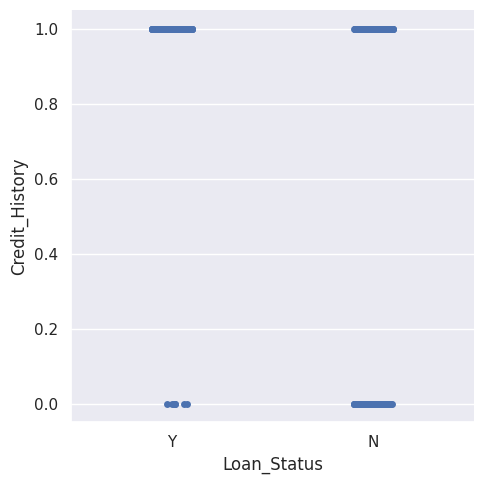

In [1209]:
# TODO : To know the contribution of Credit_History on Loan_Status
sb.catplot(x = 'Loan_Status', y = 'Credit_History', data = loan_train)

12. Property_Area


In [1210]:
# TODO : Descriptive Statistics on Property_Area
loan_train['Property_Area'].describe()

count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object

In [1211]:
# TODO : Number of null values on Property_Area
loan_train['Property_Area'].isnull().sum()

0

In [1212]:
# TODO : Unique values count in Property_Area column
loan_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [1213]:
# TODO : To get Property_Area Dummies
Property_Area_Dummies = pd.get_dummies(loan_train['Property_Area'])
Property_Area_Dummies

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [1214]:
# TODO : Create Separate column for Rural and Urban Property_Area
loan_train['Property_Area_Rural'] = Property_Area_Dummies['Rural']
loan_train['Property_Area_Semiurban'] = Property_Area_Dummies['Semiurban']


In [1215]:
# TODO : Dropping Property_Area column as it is replaced with dummy columns
loan_train.drop('Property_Area', axis = 1, inplace = True)


In [1216]:
loan_train.isnull().sum()


Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History             50
Loan_Status                 0
Property_Area_Rural         0
Property_Area_Semiurban     0
dtype: int64

In [1217]:
loan_train.dtypes


Loan_ID                     object
Gender                       int64
Married                     object
Dependents                  object
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
dtype: object

# Feature Selection


In [1218]:
# TODO : Display columns in Train Data
print(" Columns in the Train Data : \n", loan_train.columns)

 Columns in the Train Data : 
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban'],
      dtype='object')


In [1219]:
# TODO : Dropping Loan_ID column from the Train data
loan_train.drop('Loan_ID', axis = 1, inplace = True)

In [1220]:
loan_train.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban'],
      dtype='object')

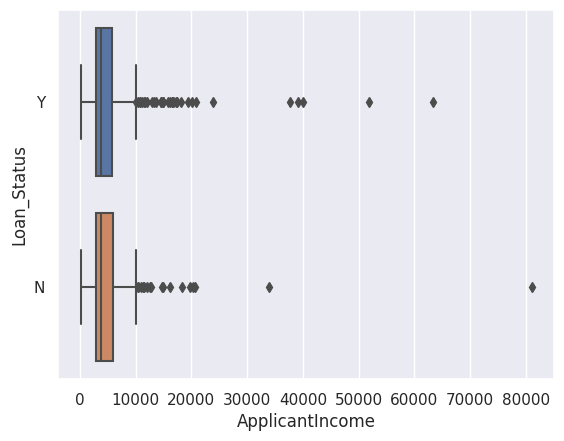

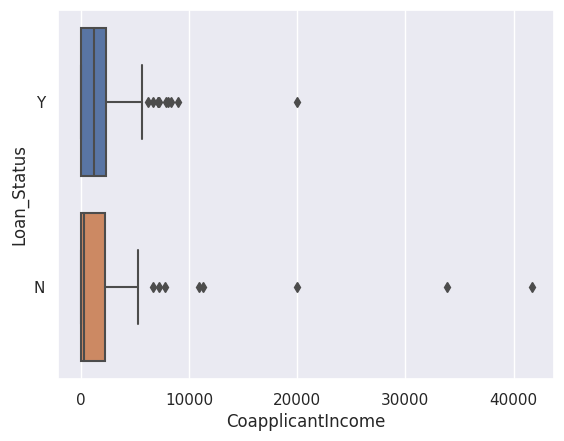

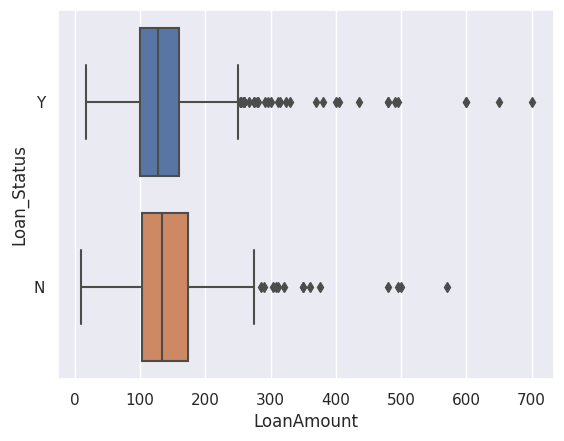

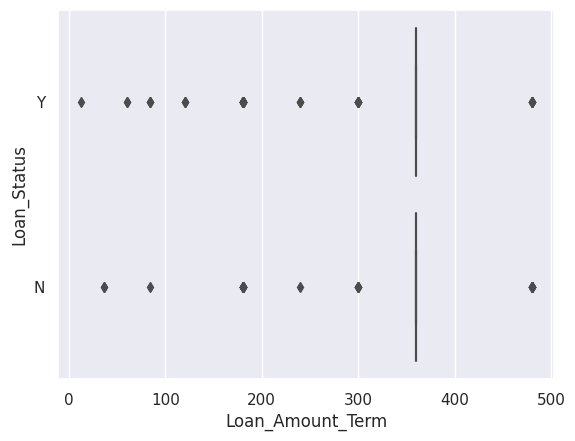

In [1221]:
numerical_continuous_data_column = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for column in numerical_continuous_data_column:
    sb.boxplot(x = column, y = 'Loan_Status', data = loan_train)
    plt.show()

In [1222]:
# TODO : Display samples having outliers on ApplicantIncome
loan_train[loan_train['ApplicantIncome'] > 25000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
155,1,{Yes},{0},1,0,39999,0.0,600.0,180.0,0.0,Y,0,1
171,-1,{Yes},{0},1,0,51763,0.0,700.0,300.0,1.0,Y,0,0
183,1,{Yes},{0},1,0,33846,0.0,260.0,360.0,1.0,N,0,1
185,1,{Yes},{0},1,1,39147,4750.0,120.0,360.0,1.0,Y,0,1
333,1,{Yes},{0},1,0,63337,0.0,490.0,180.0,1.0,Y,0,0
409,1,{Yes},{0},1,0,81000,0.0,360.0,360.0,0.0,N,1,0
443,1,{Yes},{0},1,0,37719,0.0,152.0,360.0,1.0,Y,0,1


In [1223]:
# TODO : Display samples having outliers on ApplicantIncome
loan_train[loan_train['CoapplicantIncome'] > 15000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
402,1,{Yes},{0},1,0,2500,20000.0,103.0,360.0,1.0,Y,0,1
417,1,{Yes},{0},1,1,1600,20000.0,239.0,360.0,1.0,N,0,0
581,1,{Yes},{0},1,0,1836,33837.0,90.0,360.0,1.0,N,0,0
600,0,{Yes},{0},1,0,416,41667.0,350.0,180.0,NaN,N,0,0


In [1224]:
# TODO : Display Samples having outliers on LoanAmount
loan_train[loan_train['LoanAmount'] > 400]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
130,1,{Yes},{0},1,1,20166,0.0,650.0,480.0,NaN,Y,0,0
155,1,{Yes},{0},1,0,39999,0.0,600.0,180.0,0.0,Y,0,1
171,-1,{Yes},{0},1,0,51763,0.0,700.0,300.0,1.0,Y,0,0
177,1,{Yes},{0},1,0,5516,11300.0,495.0,360.0,0.0,N,0,1
278,1,{Yes},{0},1,0,14583,0.0,436.0,360.0,1.0,Y,0,1
308,1,{Yes},{0},1,0,20233,0.0,480.0,360.0,1.0,N,1,0
333,1,{Yes},{0},1,0,63337,0.0,490.0,180.0,1.0,Y,0,0
369,1,{Yes},{0},1,0,19730,5266.0,570.0,360.0,1.0,N,1,0
432,1,{Yes},{0},1,0,12876,0.0,405.0,360.0,1.0,Y,0,1
487,1,{Yes},{0},1,0,18333,0.0,500.0,360.0,1.0,N,0,0


# Feature Observation

In [1225]:
# TODO : Rearranging Train Data columns in order to bring Loan_Status to the last of the DataFrame
loan_train = loan_train.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 10]]

In [1226]:
# TODO : Let's do the feature correlation
loan_train_corr = loan_train.corr()
loan_train_corr

<ipython-input-1226-be4d05f0568d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_train_corr = loan_train.corr()


,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban
Gender,1.000000,-0.068774,-0.047016,-0.024689,0.073642,0.022204,-0.060198,0.034345,0.063384,-0.105523
Education,-0.068774,1.000000,0.010383,0.140760,0.062290,0.167342,0.073928,0.081822,-0.077520,0.039410
Self_Employed,-0.047016,0.010383,1.000000,0.127180,-0.016100,0.115458,-0.033739,-0.002362,0.022065,0.008710
ApplicantIncome,-0.024689,0.140760,0.127180,1.000000,-0.116605,0.565583,-0.046531,-0.014715,0.015829,-0.014246
CoapplicantIncome,0.073642,0.062290,-0.016100,-0.116605,1.000000,0.187749,-0.059383,-0.002056,0.005329,-0.027044
LoanAmount,0.022204,0.167342,0.115458,0.565583,0.187749,1.000000,0.036687,-0.007498,0.043153,-0.008037
Loan_Amount_Term,-0.060198,0.073928,-0.033739,-0.046531,-0.059383,0.036687,1.000000,-0.003735,0.034321,0.059141
Credit_History,0.034345,0.081822,-0.002362,-0.014715,-0.002056,-0.007498,-0.003735,1.000000,-0.020983,0.042414
Property_Area_Rural,0.063384,-0.077520,0.022065,0.015829,0.005329,0.043153,0.034321,-0.020983,1.000000,-0.501646
Property_Area_Semiurban,-0.105523,0.039410,0.008710,-0.014246,-0.027044,-0.008037,0.059141,0.042414,-0.501646,1.000000


<Axes: >

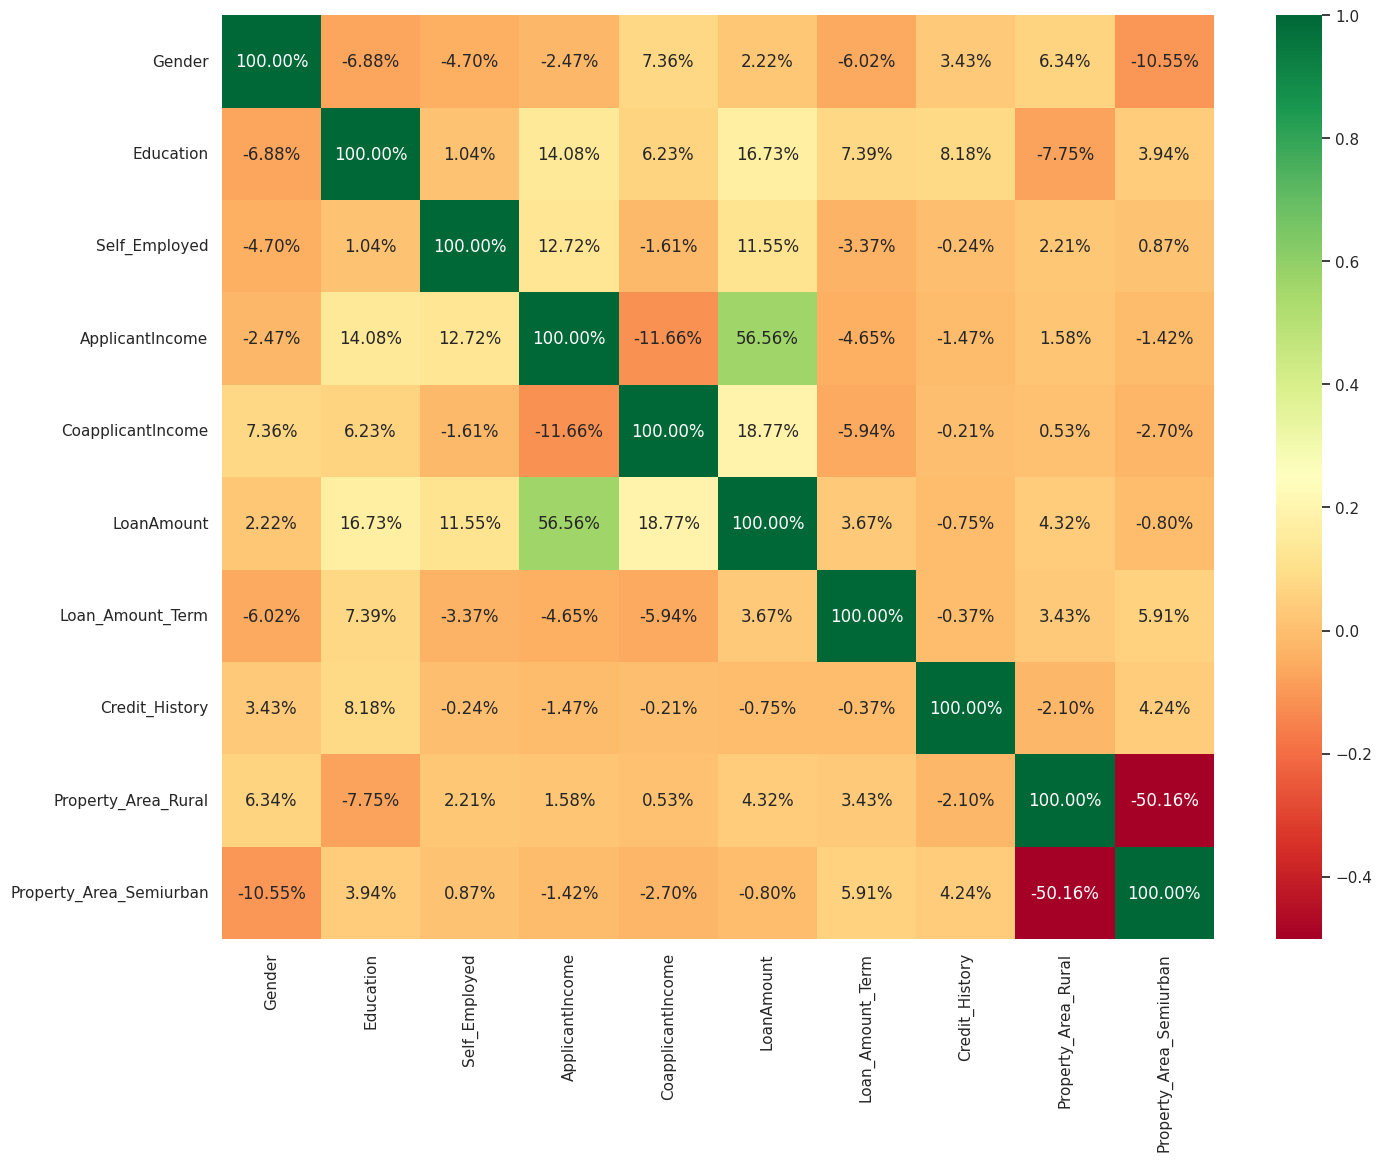

In [1227]:
# TODO : Visualizing correlation of features
plt.figure(figsize = (16, 12))
sb.heatmap(loan_train_corr, cmap = 'RdYlGn', annot = True, fmt = '.2%')
# plt.savefig('../images/correlation_of_features.png')

In [1228]:
# TODO : To know whether the dataset is Balanced or Imbalanced
loan_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [1229]:
# TODO : Correlation of Features
corr_with_loan_status = loan_train.corrwith(loan_train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]))
corr_with_loan_status

<ipython-input-1229-64b88f4eadb3>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_loan_status = loan_train.corrwith(loan_train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]))


Gender                     0.029040
Education                  0.085884
Self_Employed             -0.003700
ApplicantIncome           -0.004710
CoapplicantIncome         -0.059187
LoanAmount                -0.035052
Loan_Amount_Term          -0.022549
Credit_History             0.561678
Property_Area_Rural       -0.100694
Property_Area_Semiurban    0.136540
dtype: float64

<Axes: >

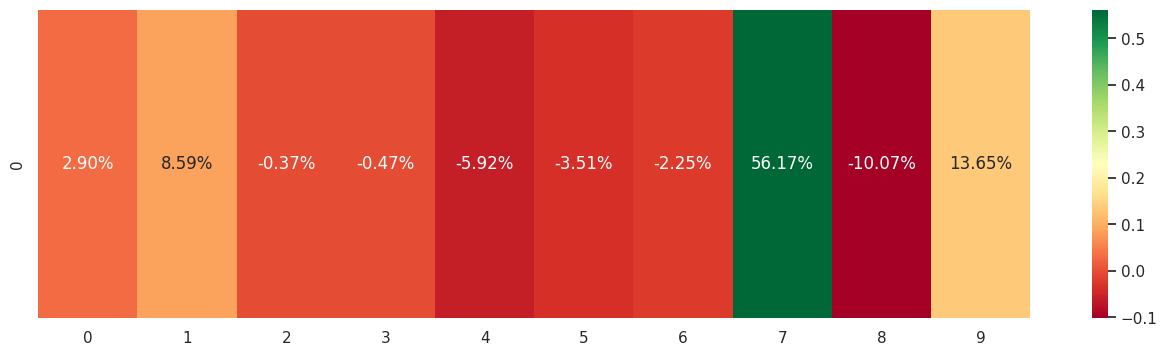

In [1230]:
# Feature correlation with loan status
plt.figure(figsize = (16, 4))
sb.heatmap([corr_with_loan_status], cmap = 'RdYlGn', annot = True, fmt = '.2%')
# plt.savefig('../images/correlation_of_features_with_loan_status.png')

<Figure size 1200x600 with 0 Axes>

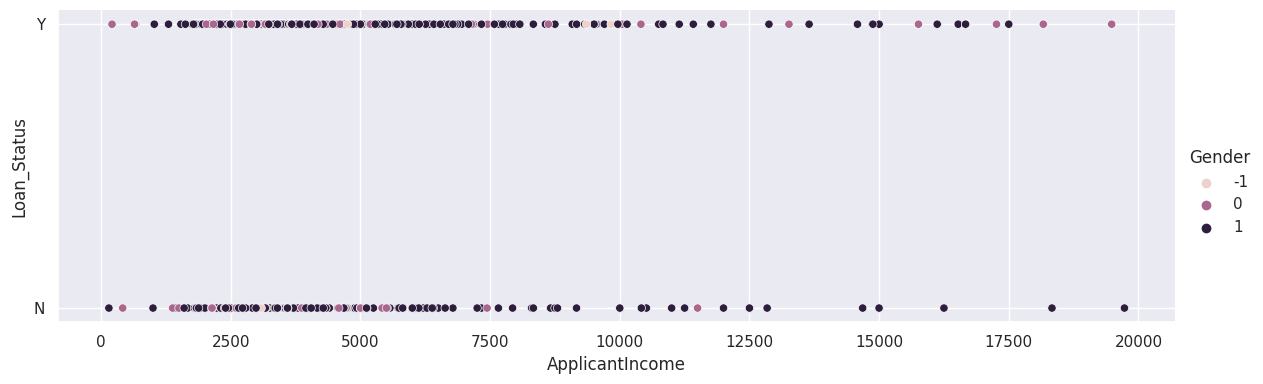

In [1231]:
# TODO : Relation between Gender, Applicant Income and Loan Status
plt.figure(figsize = (12, 6))
sb.relplot(x = 'ApplicantIncome', y = 'Loan_Status',
           data = loan_train[loan_train['ApplicantIncome'] <= 20000],
           hue = 'Gender', aspect = 3, height = 4)

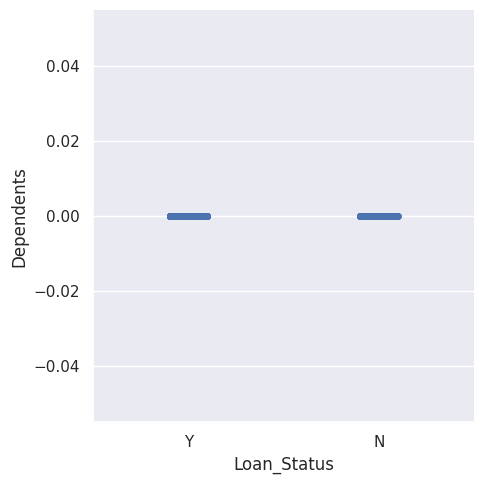

In [1232]:
loan_train['Dependents'] = loan_train['Dependents'].apply(lambda x: 0 if isinstance(x, set) else x)

# Relation Between Dependents and Loan Status
sb.catplot(x = 'Loan_Status', y = 'Dependents', data = loan_train)


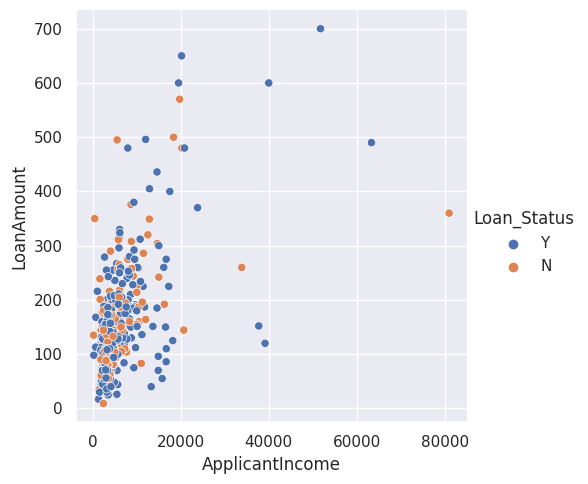

In [1233]:
# Relation Between ApplicantIncome and LoanAmount with hue as Loan_Status
sb.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data = loan_train, hue = 'Loan_Status')


In [1241]:
# print(loan_train.head())
loan_train['Loan_Status'] = loan_train['Loan_Status'].replace({'Y': 1, 'N': 0})
print(loan_train['Loan_Status'].unique())


[1 0]


In [1242]:

loan_train['Married'] = loan_train['Married'].apply(lambda x: 0 if isinstance(x, set) else x)
print(loan_train['Married'].unique())
print(loan_train['Married'].dtype)


[0]
int64


In [1243]:
# Check the data types of each column in loan_train
data_types = loan_train.dtypes

# Print the data types
print(data_types)


Gender                       int64
Married                      int64
Dependents                   int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Loan_Status                  int64
dtype: object


In [1249]:
print(loan_train.head())


   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          1              0             5849   
1       1        0           0          1              0             4583   
2       1        0           0          1              1             3000   
3       1        0           0          0              0             2583   
4       1        0           0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0      151.22             360.0             1.0   
1             1508.0      128.00             360.0             1.0   
2                0.0       66.00             360.0             1.0   
3             2358.0      120.00             360.0             1.0   
4                0.0      141.00             360.0             1.0   

   Property_Area_Rural  Property_Area_Semiurban  Loan_Status  
0                    0                        0      

In [1250]:
from sklearn.impute import SimpleImputer

# Assuming loan_train is your DataFrame
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' based on your needs
loan_train_imputed = pd.DataFrame(imputer.fit_transform(loan_train), columns=loan_train.columns)


In [1251]:
X = loan_train_imputed.drop(['Loan_Status'], axis=1)
y = loan_train_imputed['Loan_Status']


In [1252]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X, y)


ExtraTreesClassifier()

In [1253]:
import pandas as pd

print("Percentage Importance of each feature with respect to Loan_Status:")
feature_importances = pd.Series(etc.feature_importances_ * 100, index=X.columns)
print(feature_importances)


Percentage Importance of each feature with respect to Loan_Status:
Gender                      2.767840
Married                     0.000000
Dependents                  0.000000
Education                   1.505902
Self_Employed               2.136630
ApplicantIncome            20.908604
CoapplicantIncome          13.299304
LoanAmount                 21.086571
Loan_Amount_Term            5.276063
Credit_History             29.575084
Property_Area_Rural         1.457334
Property_Area_Semiurban     1.986668
dtype: float64


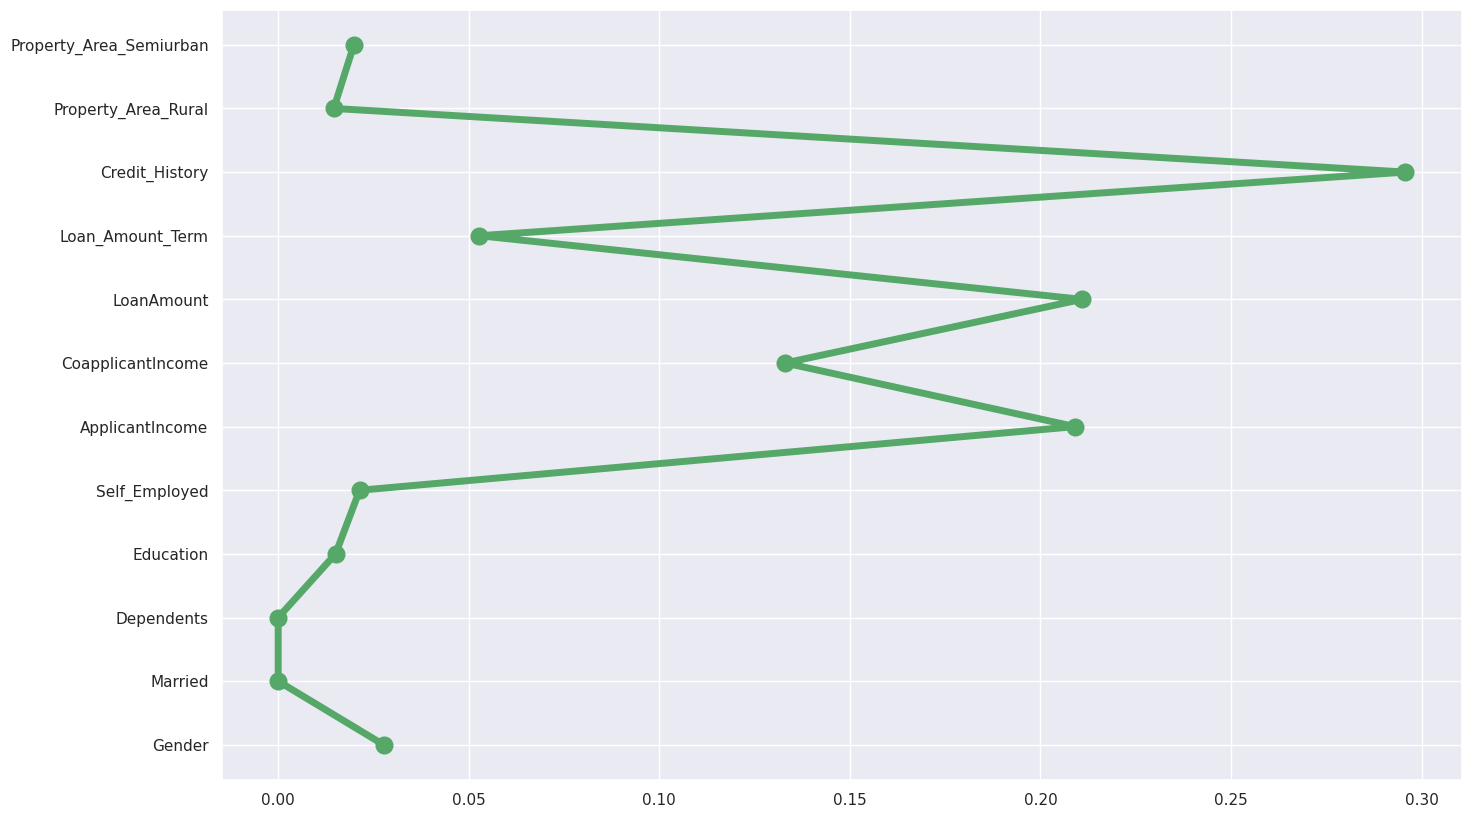

In [1254]:
plt.figure(figsize=(16, 10))
plt.plot(etc.feature_importances_, loan_train.columns[:-1], 'g-o', linewidth=5, markersize=12)
# plt.savefig("../images/feature_importances.png")

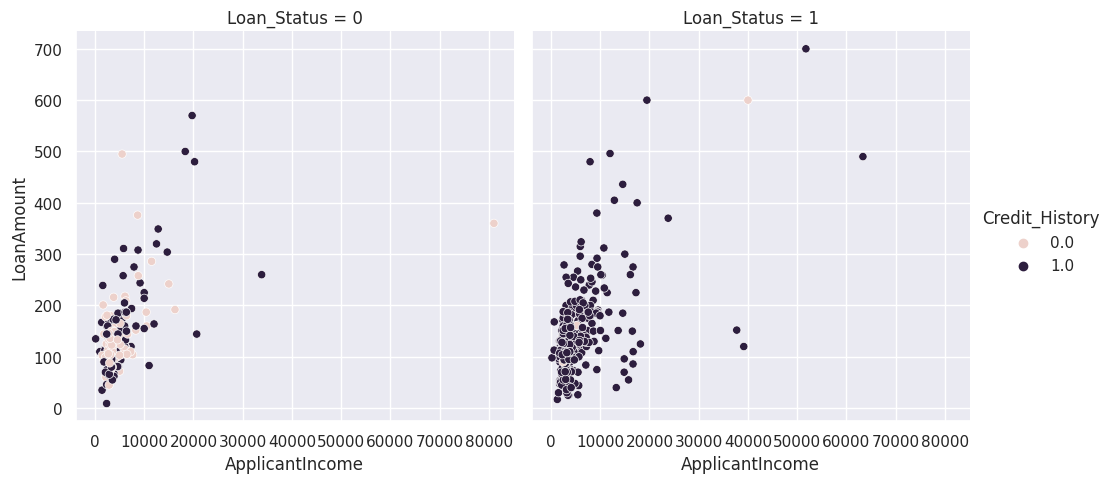

In [1255]:
# TODO : Relation Between Credit_History, Loan_Amount and Applicant_Income with Loan_Status
sb.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data = loan_train,
           hue = 'Credit_History', col = 'Loan_Status')

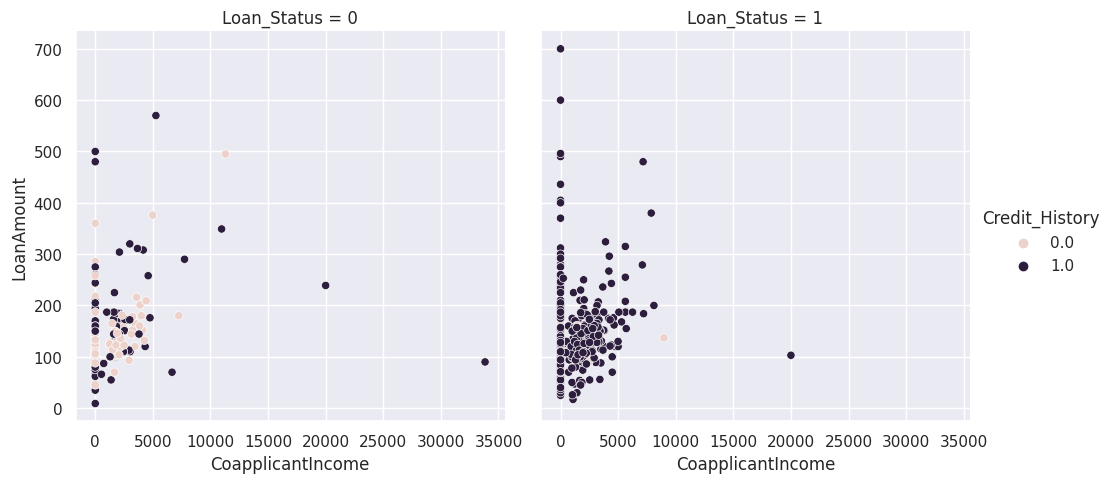

In [1256]:
# TODO : Relation Between Credit_History, Loan_Amount and Coapplicant_Income with Loan_Status
sb.relplot(x = 'CoapplicantIncome', y = 'LoanAmount', data = loan_train,
           hue = 'Credit_History', col = 'Loan_Status')

# Feature Selection


In [1257]:
# TODO : Arranging features based on their importance to the Loan_Status
prediction_features = pd.Series(etc.feature_importances_*100, index = loan_train.columns[:-1]).sort_values(ascending = False)

In [1258]:
# TODO : Extracting Features name
prediction_features = prediction_features.index

In [1259]:
prediction_features = prediction_features[:5]
prediction_features

Index(['Credit_History', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term'],
      dtype='object')

# Model Building


In [1260]:
feature_columns = loan_train[prediction_features]
prediction_column = loan_train['Loan_Status']

In [1261]:
X = feature_columns.values
y = prediction_column.values

In [1262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)


In [1263]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((491, 5), (123, 5), (491,), (123,))

In [1274]:
# from sklearn.impute import SimpleImputer

# # Assuming X_train is your numpy array
# # Impute missing values with the mean (you can choose a different strategy)
# imputer = SimpleImputer(strategy='mean')
# X_train_imputed = imputer.fit_transform(X_train)

# # Convert the imputed array back to a DataFrame if necessary
# X_train_imputed = pd.DataFrame(X_train_imputed)

# # Now you can use X_train_imputed for training your model


In [1277]:
# from sklearn.linear_model import LogisticRegression

# # Create and fit the logistic regression model
# logistic_model = LogisticRegression(max_iter=200)
# logistic_model.fit(X_train_imputed, y_train)

# # Print training accuracy
# print("Training Accuracy: {}%".format(logistic_model.score(X_train_imputed, y_train) * 100))


Training Accuracy: 80.04073319755601%


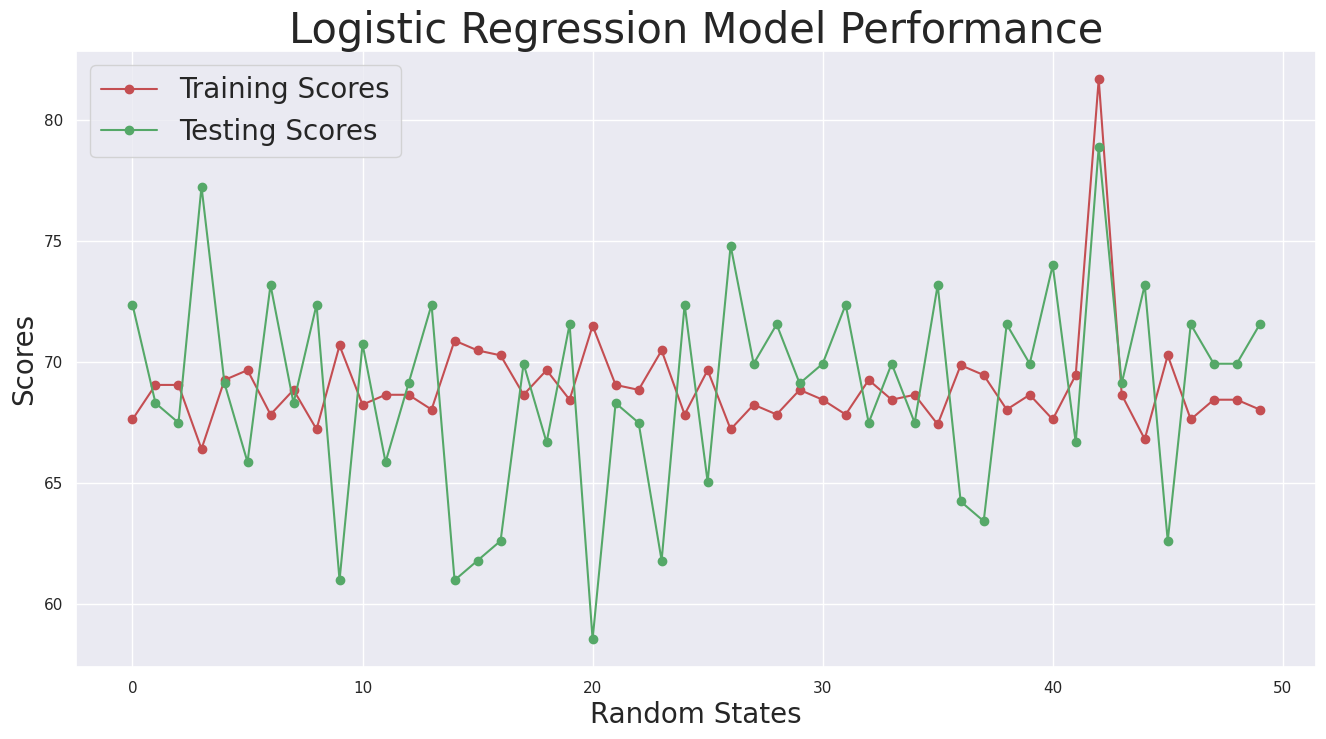

In [1287]:
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean (you can choose a different strategy)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

train_scores = []
test_scores = []
logistic_model_dict = {}
random_states = list(range(50))

for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Move the model creation and fitting inside the loop
    logistic_model = LogisticRegression(max_iter=200)
    logistic_model.fit(X_train_imputed, y_train)

    # Evaluate on both training and testing sets
    train_score = logistic_model.score(X_train_imputed, y_train) * 100
    test_score = logistic_model.score(X_test_imputed, y_test) * 100

    logistic_model_dict[random_state] = {'Train Score': train_score, 'Test Score': test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize=(16, 8))
plt.plot(random_states, train_scores, 'ro-', label='Training Scores')
plt.plot(random_states, test_scores, 'go-', label='Testing Scores')
plt.xlabel('Random States', fontsize=20)
plt.ylabel('Scores', fontsize=20)
plt.title('Logistic Regression Model Performance', fontsize=30)
# Uncomment the line below if you want to set a specific y-axis range
# plt.ylim(0, 100)
plt.legend(fontsize=20)
plt.show()


In [1288]:
# Let's print the corresponding Training and Testing Scores
for scores in zip(train_scores, test_scores, abs(np.array(train_scores) - np.array(test_scores))):
    print(scores)

(67.61710794297352, 72.35772357723577, 4.740615634262255)
(69.04276985743381, 68.29268292682927, 0.7500869306045388)
(69.04276985743381, 67.47967479674797, 1.5630950606858391)
(66.39511201629328, 77.23577235772358, 10.840660341430294)
(69.24643584521385, 69.10569105691057, 0.1407447883032802)
(69.65376782077392, 65.85365853658537, 3.800109284188551)
(67.82077393075356, 73.17073170731707, 5.349957776563514)
(68.83910386965377, 68.29268292682927, 0.546420942824497)
(67.20977596741345, 72.35772357723577, 5.1479476098223245)
(70.67209775967413, 60.97560975609756, 9.696488003576569)
(68.22810590631364, 70.73170731707317, 2.5036014107595292)
(68.63543788187373, 65.85365853658537, 2.7817793452883564)
(68.63543788187373, 69.10569105691057, 0.47025317503684505)
(68.0244399185336, 72.35772357723577, 4.333283658702172)
(70.87576374745417, 60.97560975609756, 9.90015399135661)
(70.46843177189409, 61.78861788617886, 8.679813885715227)
(70.26476578411406, 62.601626016260155, 7.663139767853906)
(68.63

In [1289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)


# Logistic Regression with Standard Scaling and PCA


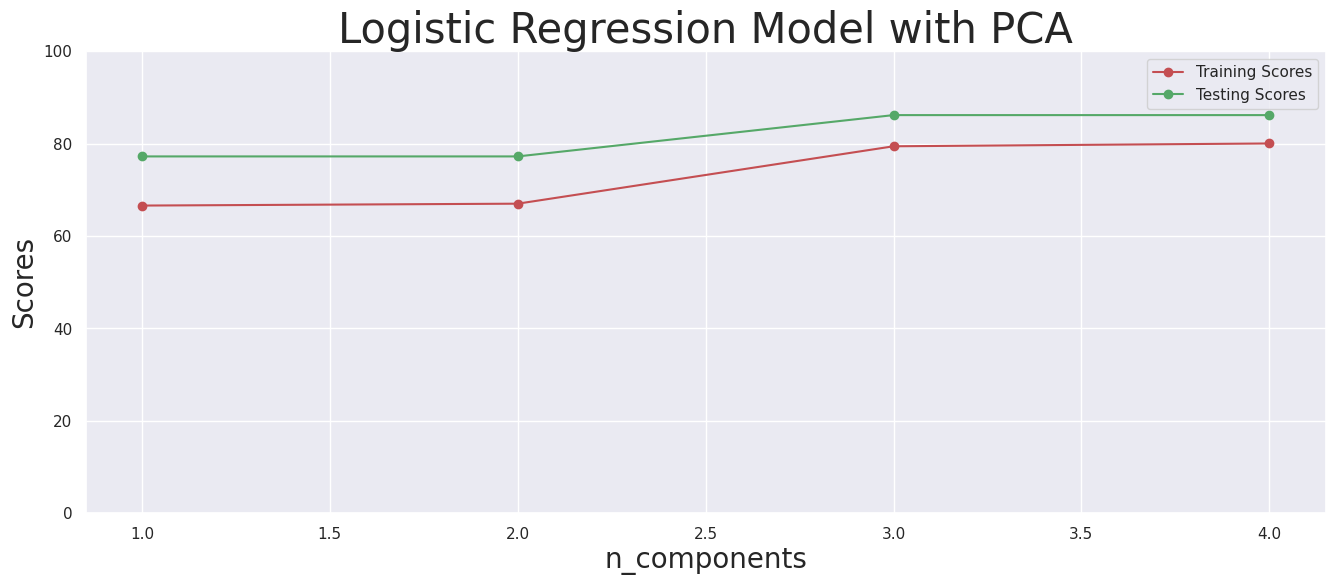

In [1295]:


# Assuming X_train, X_test, y_train, and y_test are your data
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed

# Impute missing values in X_train
X_train_imputed = imputer.fit_transform(X_train)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Handle missing values and scale X_test similarly
X_test_imputed = imputer.transform(X_test)
X_test_scaled = scaler.transform(X_test_imputed)

training_scores = []
testing_scores = []
n_components = list(range(1, 5))

for n_component in n_components:
    # PCA Implementation
    pca = PCA(n_components=n_component)
    pca_X_train = pca.fit_transform(X_train_scaled)
    pca_X_test = pca.transform(X_test_scaled)

    # Create and fit the logistic regression model on the PCA-transformed data
    logistic_model = LogisticRegression(max_iter=200)
    logistic_model.fit(pca_X_train, y_train)

    # Evaluate on both training and testing sets
    training_scores.append(logistic_model.score(pca_X_train, y_train) * 100)
    testing_scores.append(logistic_model.score(pca_X_test, y_test) * 100)

plt.figure(figsize=(16, 6))
plt.plot(n_components, training_scores, 'ro-', label='Training Scores')
plt.plot(n_components, testing_scores, 'go-', label='Testing Scores')
plt.xlabel('n_components', fontsize=20)
plt.ylabel('Scores', fontsize=20)
plt.title('Logistic Regression Model with PCA', fontsize=30)
plt.ylim(0, 100)
plt.legend()
plt.show()


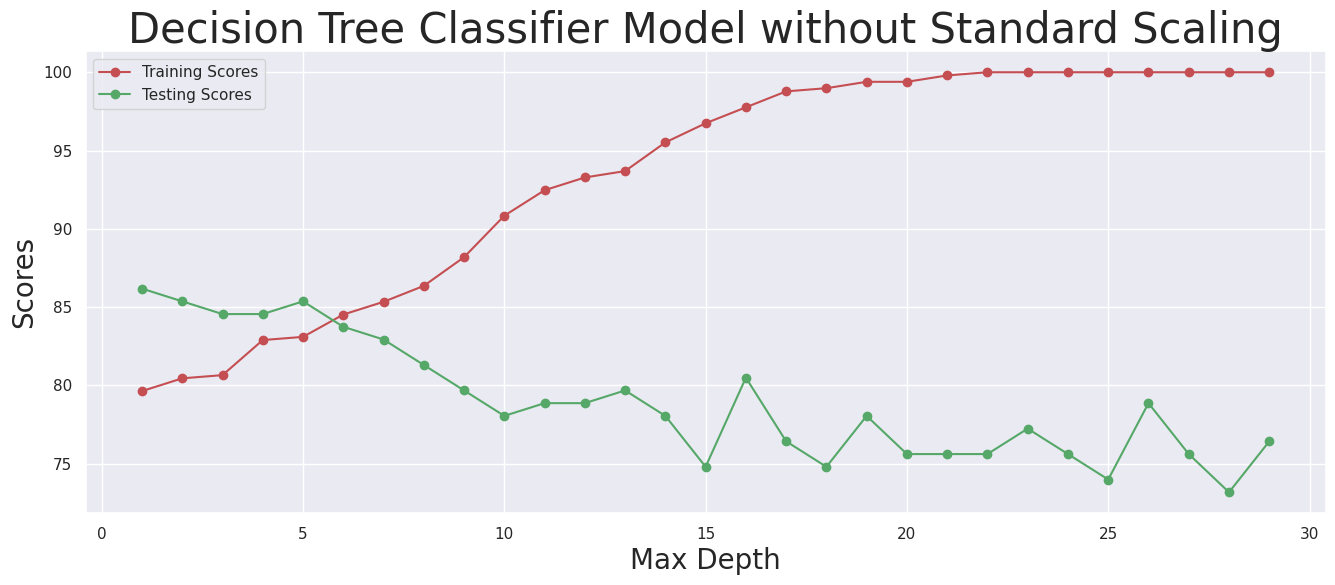

In [1297]:


# Assuming X_train, X_test, y_train, and y_test are your data
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed

# Impute missing values in X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

training_scores = []
testing_scores = []
max_depths = list(range(1, 30))

for max_depth in max_depths:
    # Create and fit the decision tree classifier
    decision_tree_classifier = DecisionTreeClassifier(max_depth=max_depth)
    decision_tree_classifier.fit(X_train_imputed, y_train)

    # Evaluate on both training and testing sets
    training_scores.append(decision_tree_classifier.score(X_train_imputed, y_train) * 100)
    testing_scores.append(decision_tree_classifier.score(X_test_imputed, y_test) * 100)

plt.figure(figsize=(16, 6))
plt.plot(max_depths, training_scores, 'ro-', label='Training Scores')
plt.plot(max_depths, testing_scores, 'go-', label='Testing Scores')
plt.xlabel('Max Depth', fontsize=20)
plt.ylabel('Scores', fontsize=20)
plt.title('Decision Tree Classifier Model without Standard Scaling', fontsize=30)
# Uncomment the line below if you want to set a specific y-axis range
# plt.ylim(0, 100)
plt.legend()
plt.show()


In [1298]:
# Let's print the corresponding Training and Testing Scores
for scores in zip(training_scores, testing_scores, abs(np.array(training_scores) - np.array(testing_scores))):
    print(scores)

(79.63340122199592, 86.1788617886179, 6.545460566621969)
(80.44806517311609, 85.36585365853658, 4.917788485420488)
(80.65173116089613, 84.5528455284553, 3.9011143675591597)
(82.89205702647658, 84.5528455284553, 1.6607885019787147)
(83.09572301425662, 85.36585365853658, 2.270130644279959)
(84.5213849287169, 83.73983739837398, 0.7815475303429196)
(85.33604887983707, 82.92682926829268, 2.409219611544387)
(86.35437881873727, 81.30081300813008, 5.053565810607196)
(88.18737270875764, 79.67479674796748, 8.512575960790159)
(90.83503054989816, 78.04878048780488, 12.786250062093288)
(92.4643584521385, 78.86178861788618, 13.602569834252321)
(93.27902240325867, 78.86178861788618, 14.417233785372488)
(93.68635437881873, 79.67479674796748, 14.011557630851257)
(95.5193482688391, 78.04878048780488, 17.47056778103422)
(96.74134419551935, 74.79674796747967, 21.94459622803967)
(97.75967413441956, 80.48780487804879, 17.271869256370763)
(98.77800407331976, 76.42276422764228, 22.355239845677488)
(98.9816700

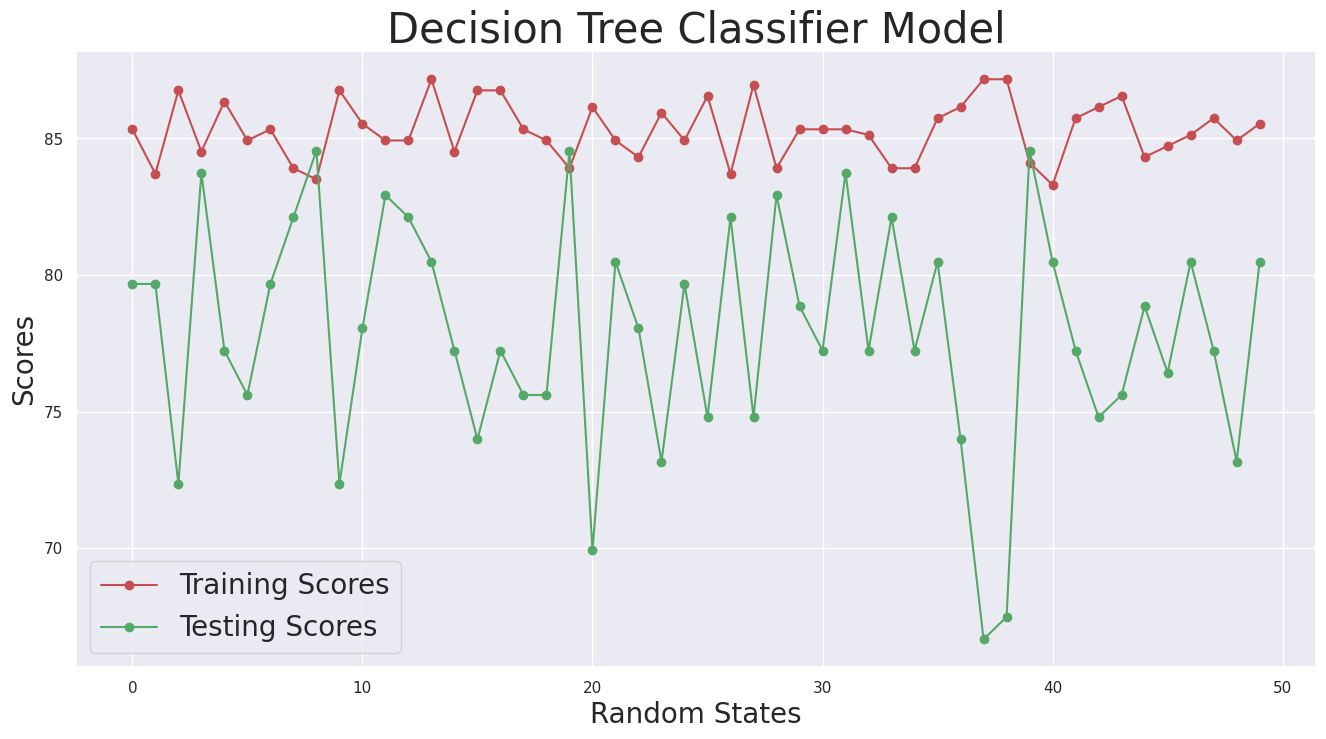

In [1300]:
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the entire dataset
X_imputed = imputer.fit_transform(X)

train_scores = []
test_scores = []
decision_tree_model_dict = {}
random_states = list(range(50))

for random_state in random_states:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=random_state)

    # Create and fit the decision tree classifier
    decision_tree_model = DecisionTreeClassifier(max_depth=6)
    decision_tree_model.fit(X_train, y_train)

    # Evaluate on both training and testing sets
    train_score = decision_tree_model.score(X_train, y_train) * 100
    test_score = decision_tree_model.score(X_test, y_test) * 100

    decision_tree_model_dict[random_state] = {'Train Score': train_score, 'Test Score': test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize=(16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('Random States', fontsize=20)
plt.ylabel('Scores', fontsize=20)
plt.title('Decision Tree Classifier Model', fontsize=30)
# Uncomment the line below if you want to set a specific y-axis range
# plt.ylim(0, 100)
plt.legend(labels=['Training Scores', 'Testing Scores'], fontsize=20)
plt.show()


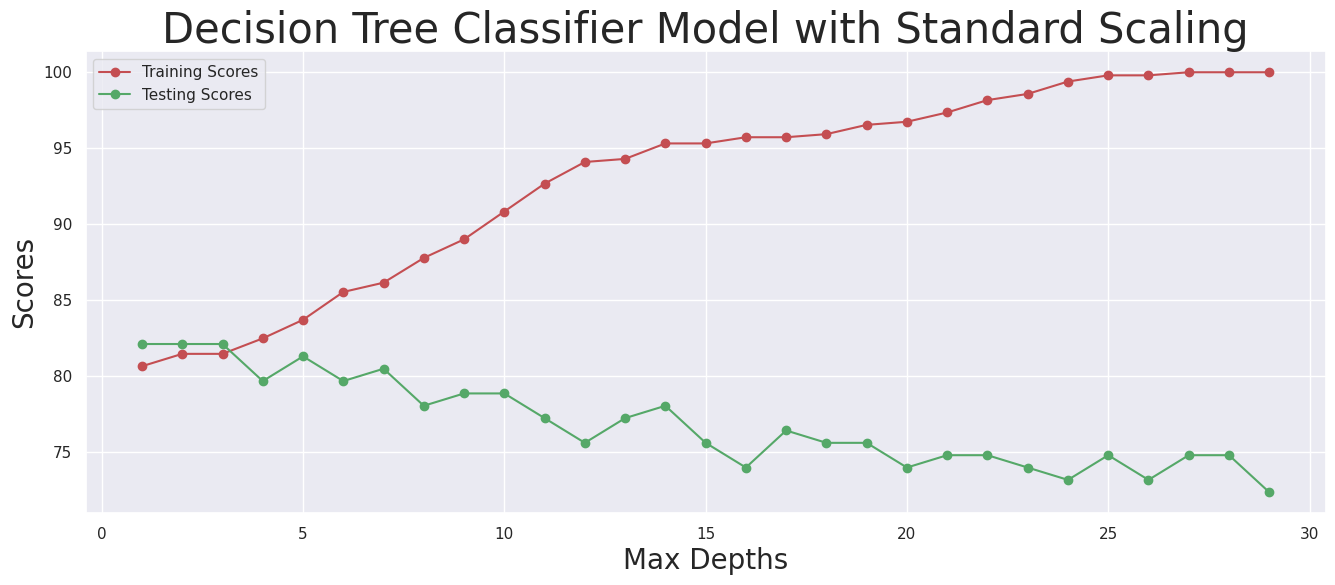

In [1301]:
training_scores = []
testing_scores = []
max_depths = list(range(1, 30))
for max_depth in max_depths:
    # Converting Train Data to Same Scale
    standard_scaler = StandardScaler()

    scaled_X_train = standard_scaler.fit_transform(X_train)
    scaled_X_test = standard_scaler.transform(X_test)

    decision_tree_model = DecisionTreeClassifier(max_depth = max_depth)
    decision_tree_model.fit(scaled_X_train, y_train)
    training_scores.append(decision_tree_model.score(scaled_X_train, y_train) * 100)
    testing_scores.append(decision_tree_model.score(scaled_X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(max_depths, training_scores, 'ro-')
plt.plot(max_depths, testing_scores, 'go-')
plt.xlabel('Max Depths', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifier Model with Standard Scaling', fontsize = 30)
# plt.ylim(50, 105)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
plt.show()

In [1302]:
# Let's print the corresponding Training and Testing Scores
for scores in zip(training_scores, testing_scores):
    print(scores)

(80.65173116089613, 82.11382113821138)
(81.4663951120163, 82.11382113821138)
(81.4663951120163, 82.11382113821138)
(82.4847250509165, 79.67479674796748)
(83.70672097759673, 81.30081300813008)
(85.5397148676171, 79.67479674796748)
(86.15071283095723, 80.48780487804879)
(87.78004073319755, 78.04878048780488)
(89.0020366598778, 78.86178861788618)
(90.83503054989816, 78.86178861788618)
(92.66802443991853, 77.23577235772358)
(94.09368635437882, 75.60975609756098)
(94.29735234215886, 77.23577235772358)
(95.31568228105907, 78.04878048780488)
(95.31568228105907, 75.60975609756098)
(95.72301425661914, 73.98373983739837)
(95.72301425661914, 76.42276422764228)
(95.9266802443992, 75.60975609756098)
(96.5376782077393, 75.60975609756098)
(96.74134419551935, 73.98373983739837)
(97.35234215885947, 74.79674796747967)
(98.16700610997964, 74.79674796747967)
(98.57433808553971, 73.98373983739837)
(99.38900203665987, 73.17073170731707)
(99.79633401221996, 74.79674796747967)
(99.79633401221996, 73.170731707

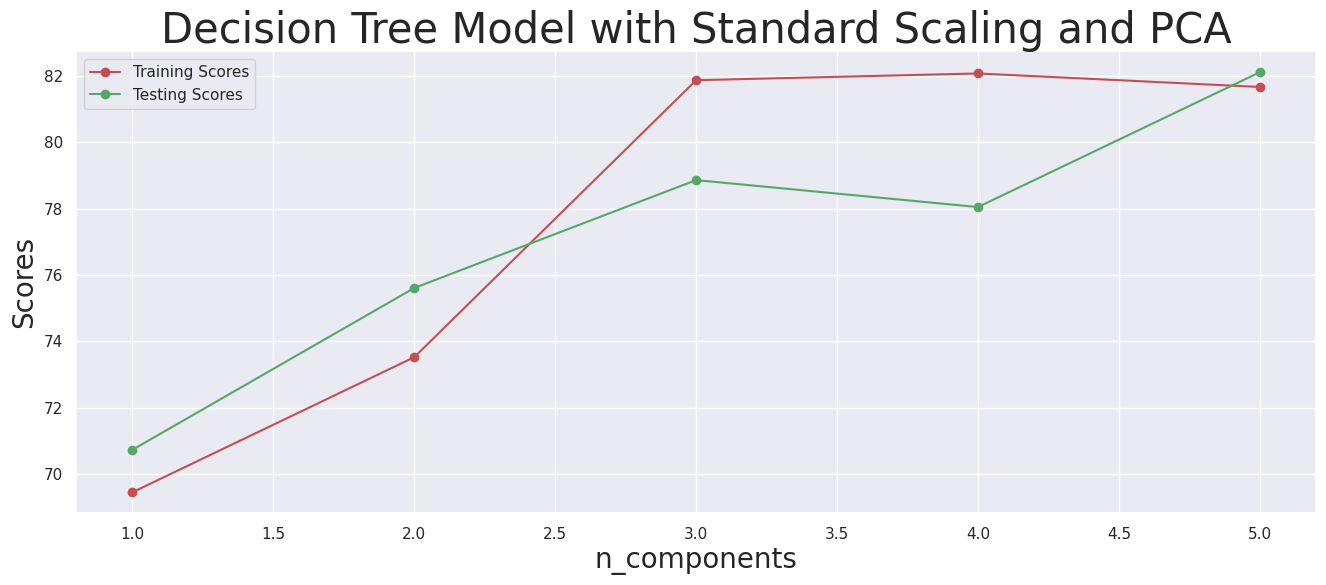

Max_Depth :  3
(69.4501018329939, 70.73170731707317)
(73.5234215885947, 75.60975609756098)
(81.87372708757637, 78.86178861788618)
(82.07739307535643, 78.04878048780488)
(81.67006109979633, 82.11382113821138)


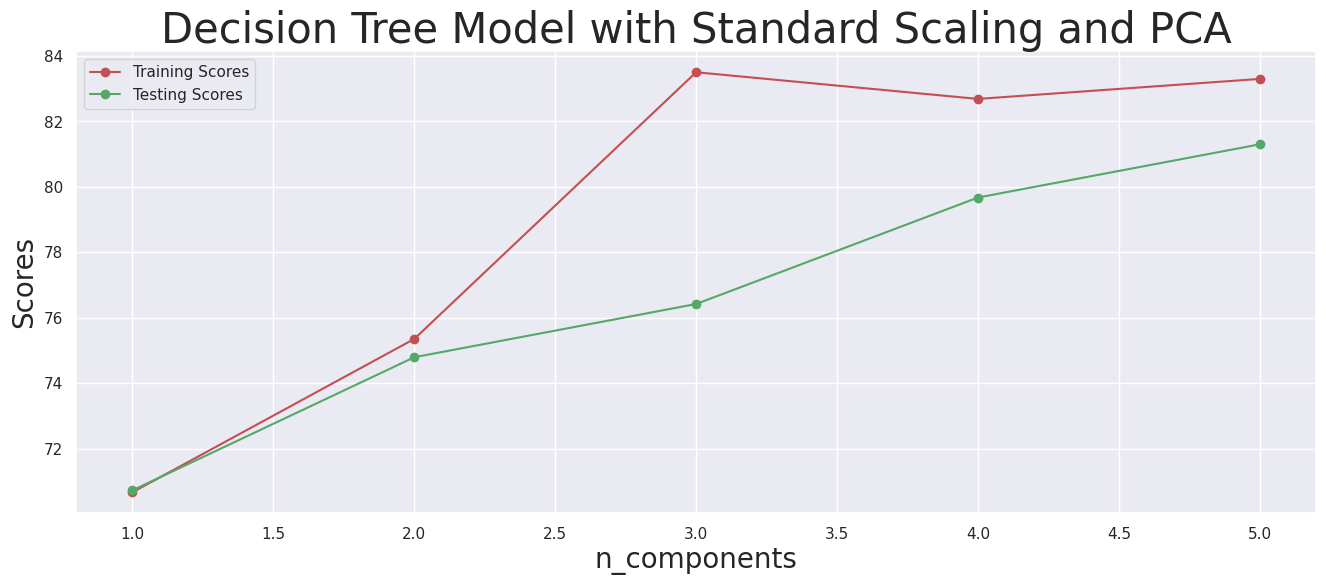

Max_Depth :  4
(70.67209775967413, 70.73170731707317)
(75.35641547861506, 74.79674796747967)
(83.5030549898167, 76.42276422764228)
(82.68839103869654, 79.67479674796748)
(83.29938900203666, 81.30081300813008)


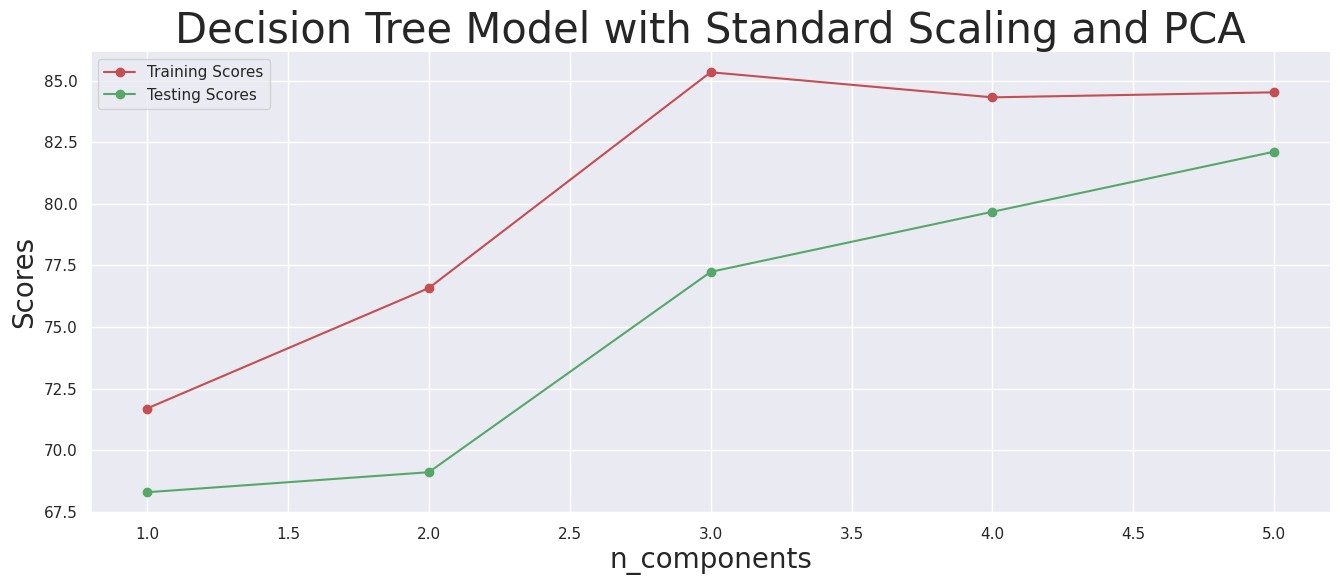

Max_Depth :  5
(71.69042769857434, 68.29268292682927)
(76.57841140529531, 69.10569105691057)
(85.33604887983707, 77.23577235772358)
(84.31771894093686, 79.67479674796748)
(84.5213849287169, 82.11382113821138)


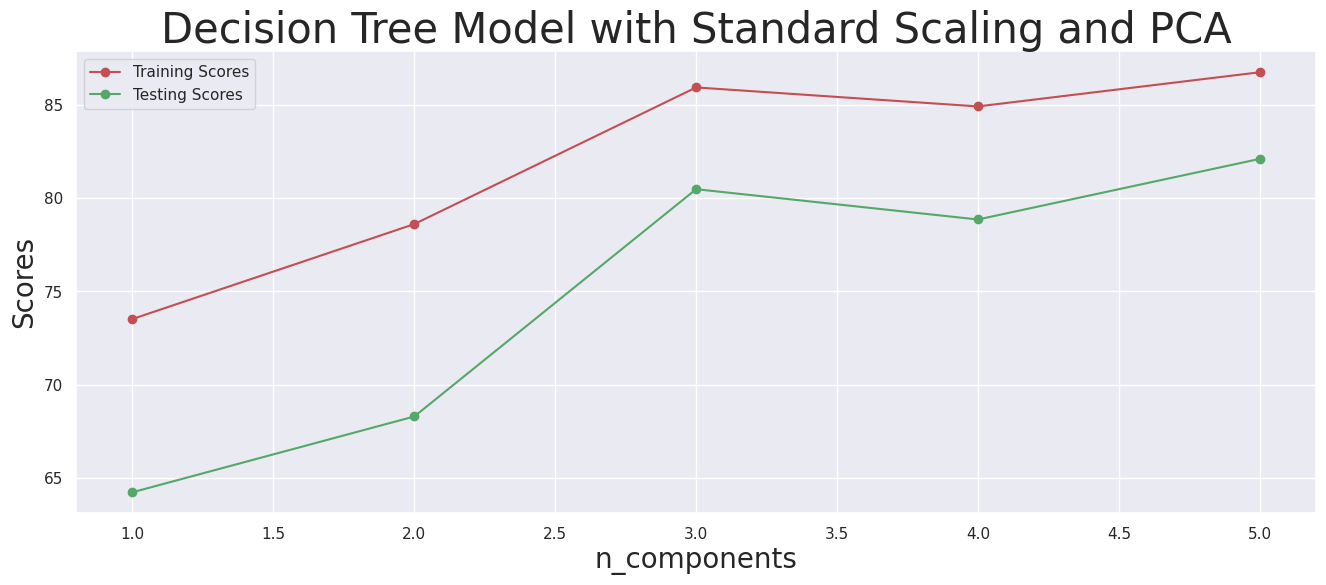

Max_Depth :  6
(73.5234215885947, 64.22764227642277)
(78.61507128309573, 68.29268292682927)
(85.94704684317719, 80.48780487804879)
(84.928716904277, 78.86178861788618)
(86.76171079429736, 82.11382113821138)


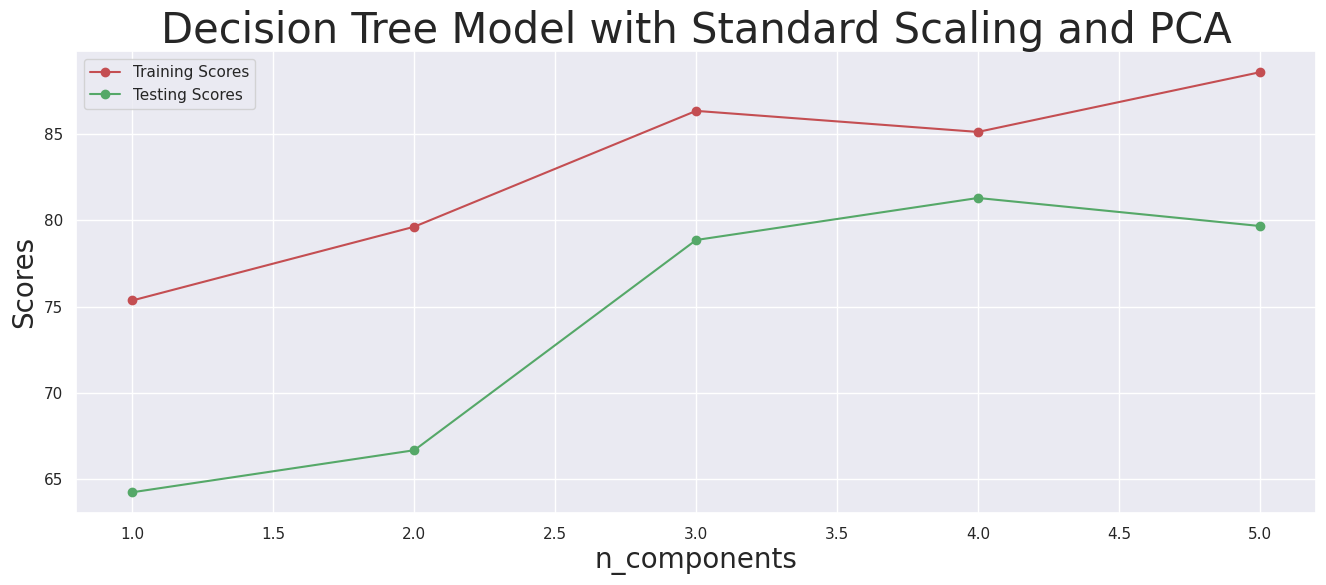

Max_Depth :  7
(75.35641547861506, 64.22764227642277)
(79.63340122199592, 66.66666666666666)
(86.35437881873727, 78.86178861788618)
(85.13238289205702, 81.30081300813008)
(88.59470468431772, 79.67479674796748)


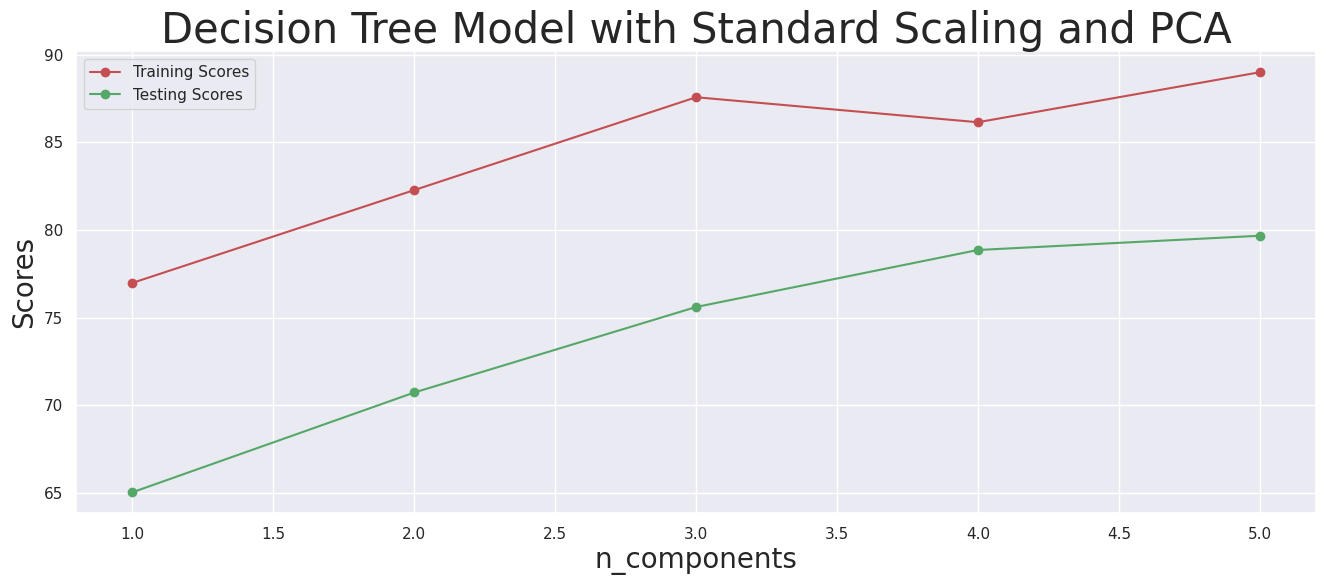

Max_Depth :  8
(76.9857433808554, 65.04065040650406)
(82.28105906313645, 70.73170731707317)
(87.57637474541752, 75.60975609756098)
(86.15071283095723, 78.86178861788618)
(89.0020366598778, 79.67479674796748)


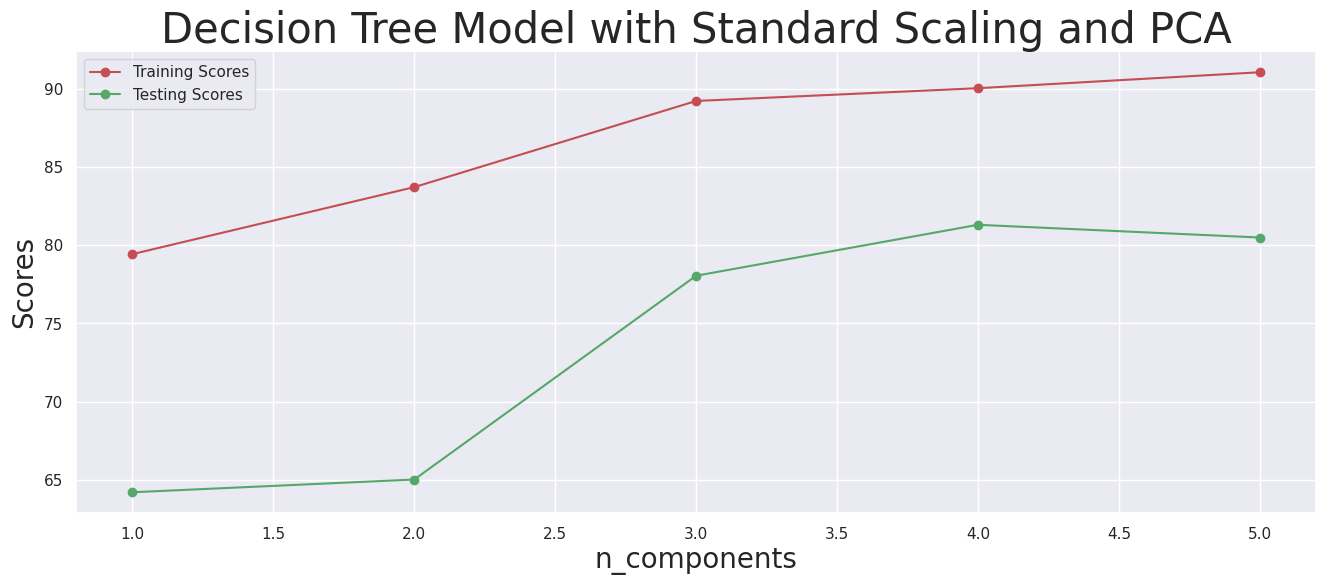

Max_Depth :  9
(79.42973523421588, 64.22764227642277)
(83.70672097759673, 65.04065040650406)
(89.20570264765783, 78.04878048780488)
(90.020366598778, 81.30081300813008)
(91.0386965376782, 80.48780487804879)


In [1303]:
for max_depth in range(3, 10):
    training_scores = []
    testing_scores = []
    n_components = list(range(1, 6))
    for n_component in n_components:
        # Converting Train Data to Same Scale
        standard_scaler = StandardScaler()
        # Scaling training samples
        scaled_X_train = standard_scaler.fit_transform(X_train)
        # Scaling testing samples
        scaled_X_test = standard_scaler.transform(X_test)

        # PCA Implementation
        pca = PCA(n_components = n_component)
        pca_X_train = pca.fit_transform(scaled_X_train)
        pca_X_test = pca.transform(scaled_X_test)

        decision_tree_model = DecisionTreeClassifier(max_depth = max_depth)
        decision_tree_model.fit(pca_X_train, y_train)
        training_scores.append(decision_tree_model.score(pca_X_train, y_train) * 100)
        testing_scores.append(decision_tree_model.score(pca_X_test, y_test) * 100)

    plt.figure(figsize = (16, 6))
    plt.plot(n_components, training_scores, 'ro-')
    plt.plot(n_components, testing_scores, 'go-')
    plt.xlabel('n_components', fontsize = 20)
    plt.ylabel('Scores', fontsize = 20)
    plt.title('Decision Tree Model with Standard Scaling and PCA', fontsize = 30)
    # plt.ylim(60, 90)
    plt.legend(labels = ['Training Scores', 'Testing Scores'])
    plt.show()

    # Let's print the corresponding Training and Testing Scores
    print("Max_Depth : ", max_depth)
    for scores in zip(training_scores, testing_scores):
        print(scores)

In [1307]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Save the trained model
model.save("loanPrediction.h5")
